# Titanic - Machine Learning from Disaster

## Importing Libraries

In [1032]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1033]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
full = pd.concat([train, test], ignore_index=True)

In [1034]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [1035]:
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [1036]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [1037]:
full.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [1038]:
full.duplicated().sum()

0

There is no duplicated data

## Data Visualization & Data Exploration

In [1039]:
def histogram_boxplot(data, feature, figsize=(12, 8), dpi=100, kde=False, bins=50):
    """
    Histogram and boxplot for a given feature
    
    Args:
        data: dataframe
        feature: str, feature name
        figsize: tuple, figure size
        dpi: int, figure dpi
        kde: bool, whether to plot kde
        bins: int, number of bins
    """

    figs, (ax_box, ax_hist) = plt.subplots(2,
                                           sharex=True,
                                           gridspec_kw={'height_ratios': (.15, .85)},
                                           figsize=figsize,
                                           dpi=dpi)

    sns.boxplot(data,
                x=feature,
                ax=ax_box,
                showmeans=True,
                color='red',
                meanline=True)

    sns.histplot(data[feature],
                 ax=ax_hist,
                 kde=kde,
                 bins=bins)

    ax_hist.axvline(data[feature].mean(),
                    color='green',
                    linestyle='--')

    ax_hist.axvline(data[feature].median(),
                    color='black',
                    linestyle='-')

    ax_box.set_title(f'{feature}', fontsize=15)


In [1040]:
def stacked_barplot(data, predictor, target):
    """
    Stacked barplot
    
    Args:
        data: dataframe
        predictor: str, predictor name
        target: str, target name
    """

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]

    tab_1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)

    print(tab_1)
    print('----------------------DIVIDED-------------------------')

    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)

    fig, ax = plt.subplots(figsize=(count + 5, 5), dpi=100)

    tab.plot(kind='bar', stacked=True, ax=ax)

    plt.xticks(rotation=0)
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

    plt.show()

In [1041]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Labeled barplot
    
    Args:
        data: dataframe
        feature: str, feature name
        perc: bool, whether to show percentage
        n: int, number of bars to show
    """

    total = len(data[feature])
    # the total number of observations
    count = data[feature].nunique()
    # total number of unique values

    if n is None:
        plt.figure(figsize=(count + 2, 6), dpi=100)
    else:
        plt.figure(figsize=(n + 2, 6), dpi=100)
        # build the figure with the given size

    ax = sns.countplot(data=data,
                       x=feature,
                       palette='Set2',
                       order=data[feature].value_counts().index[:n]
                       )
    # countplot for the given feature

    for p in ax.patches:
        if perc == True:
            label = f"{round((p.get_height() / total) * 100, 2)} %"
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        ax.annotate(label,
                    (x, y),
                    ha='center',
                    va='center',
                    fontsize=11,
                    xytext=(0, 10),
                    textcoords='offset points')

    plt.xticks(rotation=0)
    plt.xlabel(feature, fontsize=15, weight='bold')
    plt.ylabel('Count', fontsize=15, weight='bold')
    plt.title(f'{feature} Distribution by Count', fontsize=15, weight='bold')

    plt.show()

In [1042]:
def distribution_plot_wrt_target(data, predictor, target):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=100)

    target_uniques = data[target].unique()
    # get the unique values of the target

    axes[0, 0].set_title(f"Distribution of target for target = {target_uniques[0]}", fontsize=15)
    # set the title of the first plot

    sns.histplot(
        data=data[data[target] == target_uniques[0]],
        x=predictor,
        kde=True,
        ax=axes[0, 0],
        color='teal',
        stat='density'
    )
    # plot the first plot

    axes[0, 1].set_title(f"Distribution of target for target = {target_uniques[1]}", fontsize=15)
    # set the title of the second plot

    sns.histplot(
        data=data[data[target] == target_uniques[1]],
        x=predictor,
        kde=True,
        ax=axes[0, 1],
        color='teal',
        stat='density'
    )

    axes[1, 0].set_title('Boxplot w.r.t target', fontsize=15)

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axes[1, 0],
        showmeans=True,
        palette='gist_rainbow'
    )

    axes[1, 1].set_title('Violinplot w.r.t target', fontsize=15)

    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axes[1, 1],
        showmeans=True,
        palette='gist_rainbow'
    )

    plt.tight_layout()
    plt.show()

### Univariant Analysis

In [1043]:
full.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [1044]:
full.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
Ticket,1309,929,CA. 2343,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292


#### Age

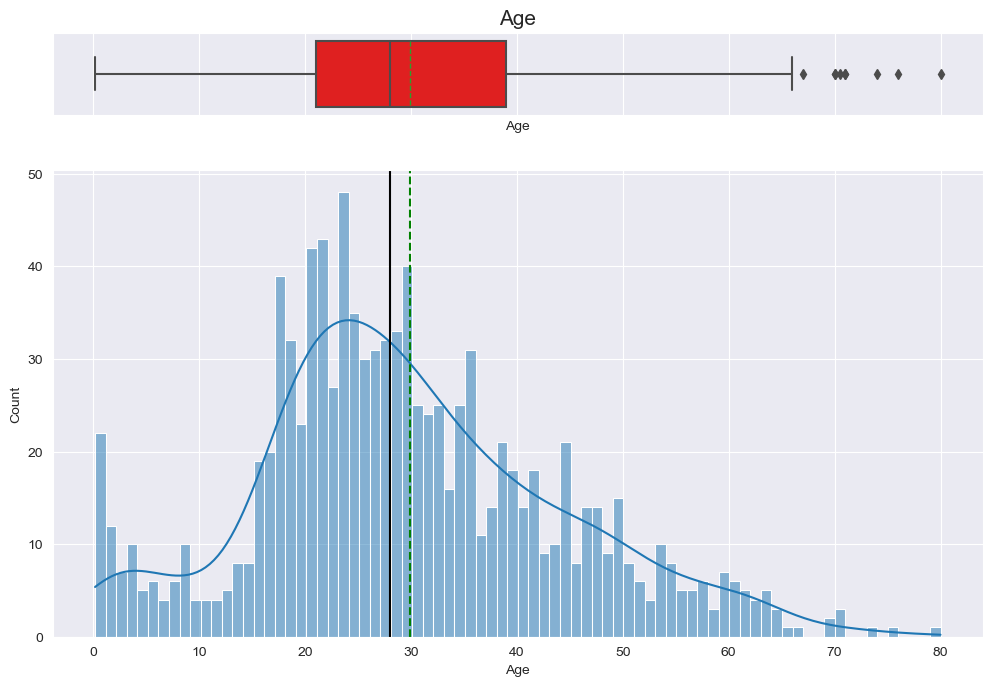

In [1045]:
histogram_boxplot(full, 'Age', kde=True, bins=80)

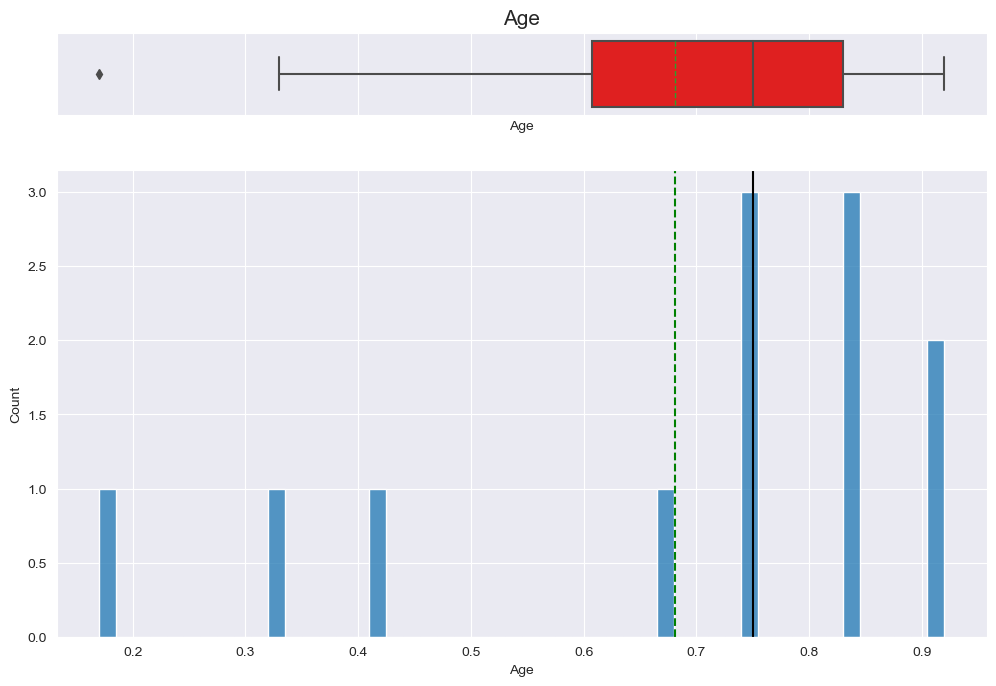

In [1046]:
histogram_boxplot(full.loc[full.Age < 1], 'Age')

In [1047]:
full.loc[full.Age < 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
78,79,1.0,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
164,165,0.0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,NaN,S
172,173,1.0,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,S
183,184,1.0,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
381,382,1.0,3,"Nakid, Miss. Maria (""Mary"")",female,1.00,0,2,2653,15.7417,NaN,C
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,S
469,470,1.0,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
644,645,1.0,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
755,756,1.0,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S


There are some data points with age less than 1. We can assume that these are babies. We can replace these values with 0.5.

In [1048]:
full.loc[full.Age < 1, 'Age'] = 0.5

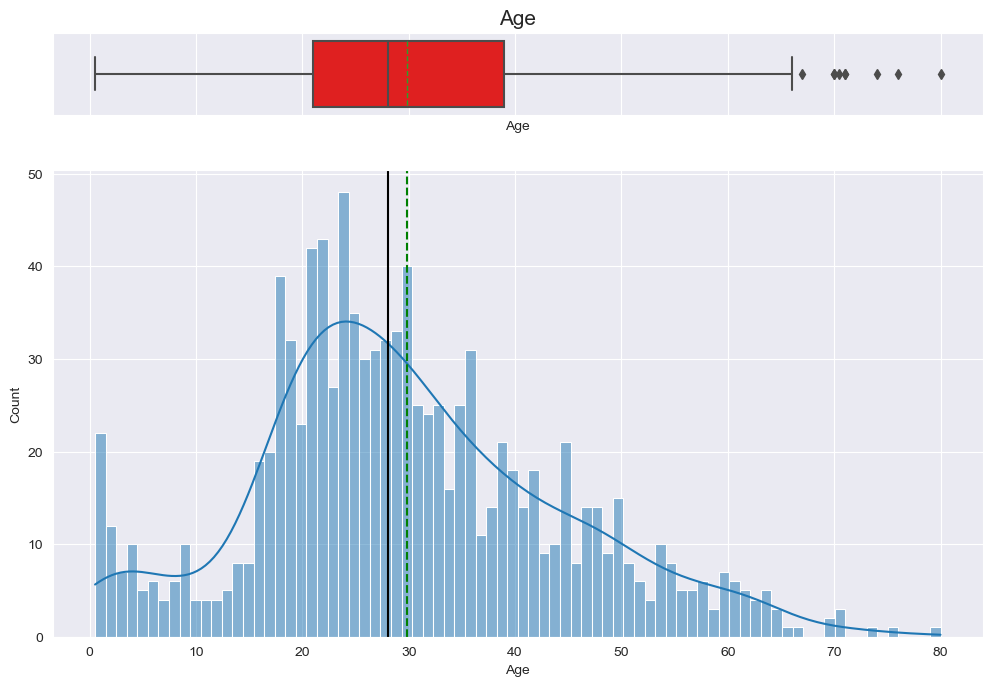

In [1049]:
histogram_boxplot(full, 'Age', kde=True, bins=80)

#### SibSp

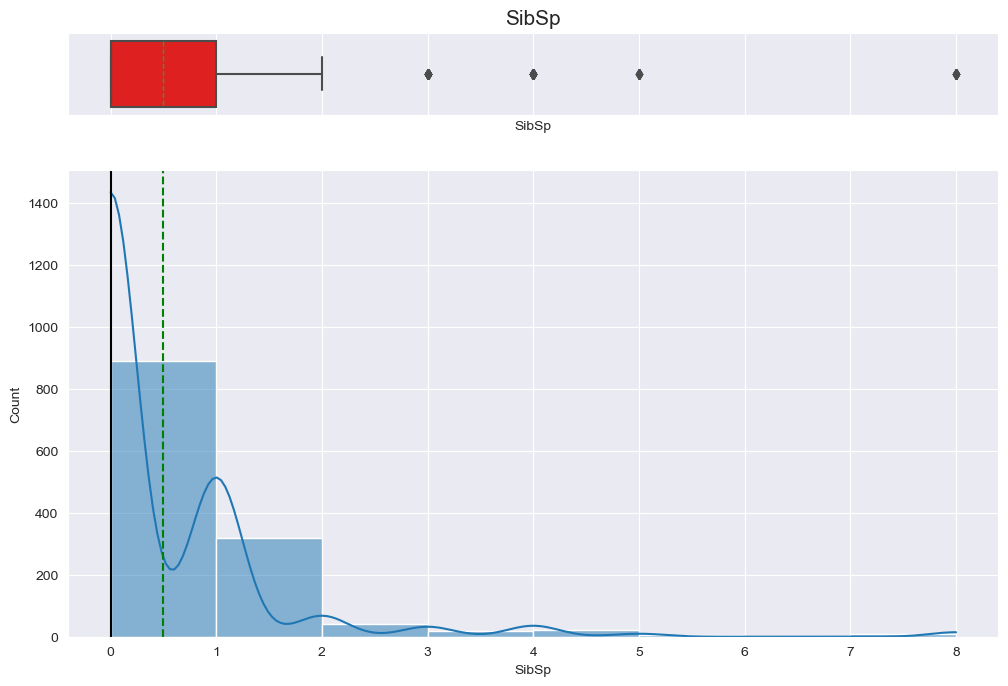

In [1050]:
histogram_boxplot(full, 'SibSp', kde=True, bins=8)

Most of the passengers are alone. We can create a new feature called 'is_alone' to indicate whether the passenger is alone or not.

#### Parch

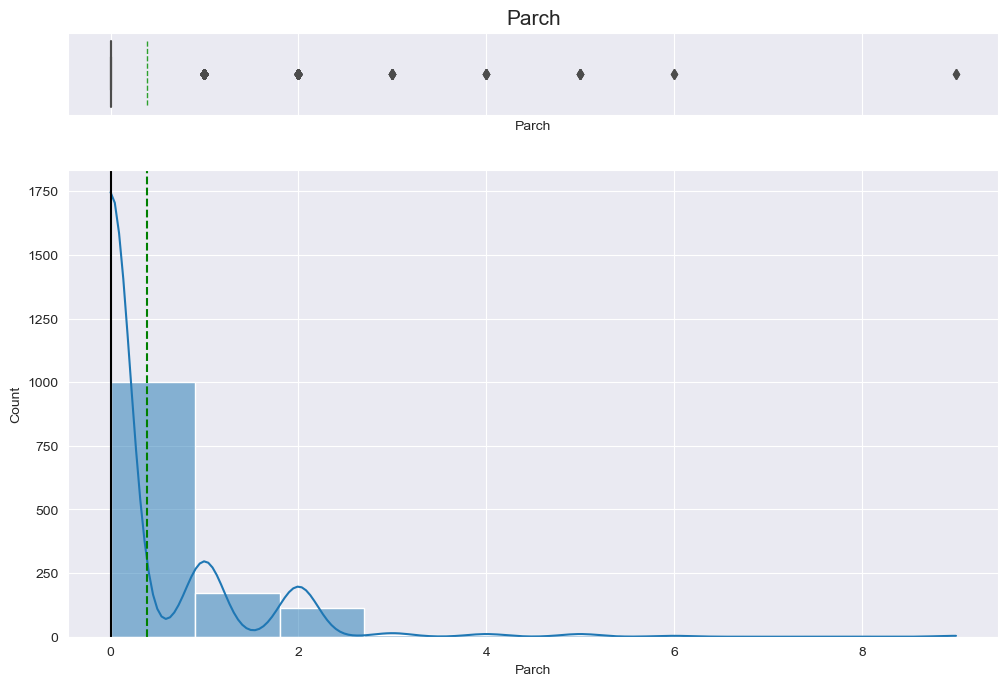

In [1051]:
histogram_boxplot(full, 'Parch', kde=True, bins=10)

In [1052]:
full.Parch.value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: Parch, dtype: int64

Most of the passengers are with 0 or 1 parent/child, we can group the passengers with 2 or more parent/child as 3.

In [1053]:
full.loc[full.Parch > 2, 'Parch'] = 3

In [1054]:
full.Parch.value_counts()

0    1002
1     170
2     113
3      24
Name: Parch, dtype: int64

#### Fare

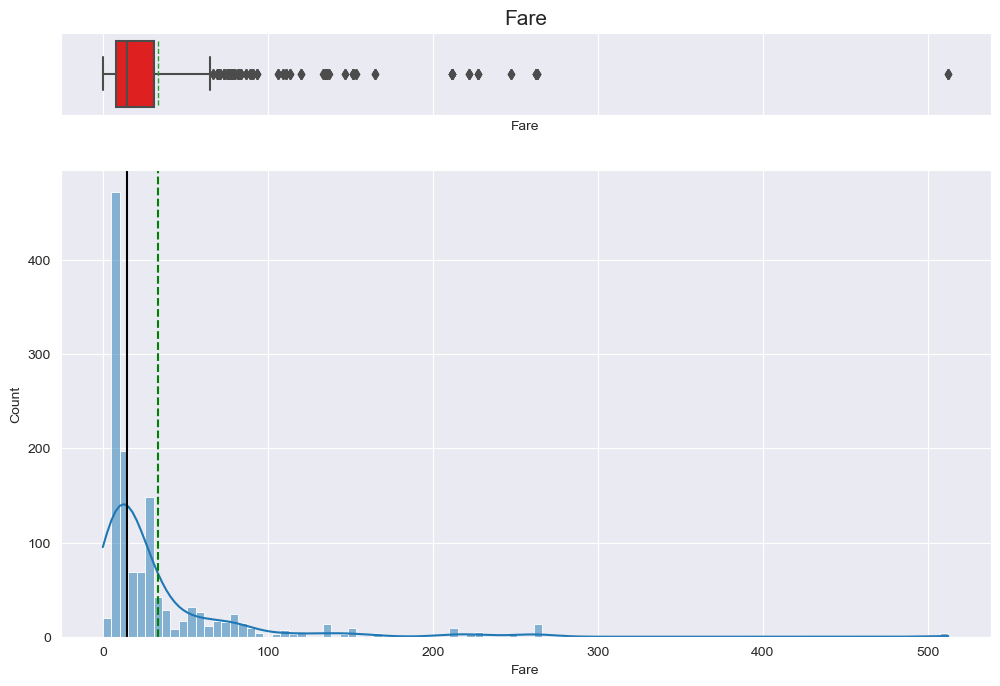

In [1055]:
histogram_boxplot(full, 'Fare', kde=True, bins=100)

There are some outliers in the fare. We can remove these outliers.

In [1056]:
full.Fare.sort_values(ascending=False)

258     512.3292
679     512.3292
1234    512.3292
737     512.3292
341     263.0000
          ...   
815       0.0000
302       0.0000
806       0.0000
263       0.0000
1043         NaN
Name: Fare, Length: 1309, dtype: float64

In [1057]:
full.loc[full.Fare == max(full.Fare)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [1058]:
full.loc[full.Fare == 263]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0.0,1,"Fortune, Mr. Mark",male,64.0,1,3,19950,263.0,C23 C25 C27,S
944,945,NaN,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0,C23 C25 C27,S
960,961,NaN,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,3,19950,263.0,C23 C25 C27,S


In [1059]:
full.sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
...,...,...,...,...,...,...,...,...,...,...,...,...
815,816,0.0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S


We will not remove the outliers because the maximum fare is not an outlier. It is the actual fare.

#### Pclass

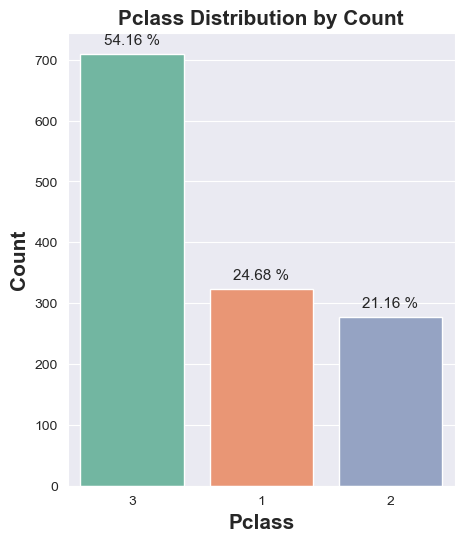

In [1060]:
labeled_barplot(full, 'Pclass', perc=True)

The majority of the passengers are in the 3rd class.
The 1 & 2 class passengers are almost equal.

#### Sex

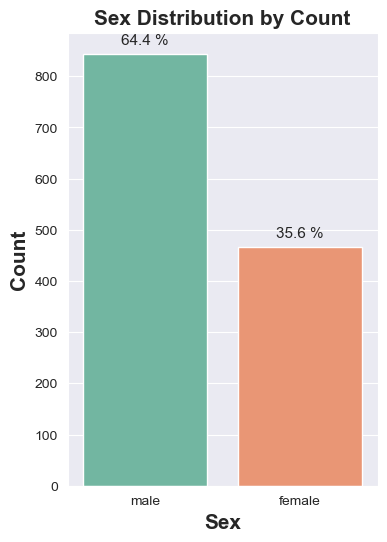

In [1061]:
labeled_barplot(full, 'Sex', perc=True)

The male passengers are more than the female passengers.

### Bivariant Analysis

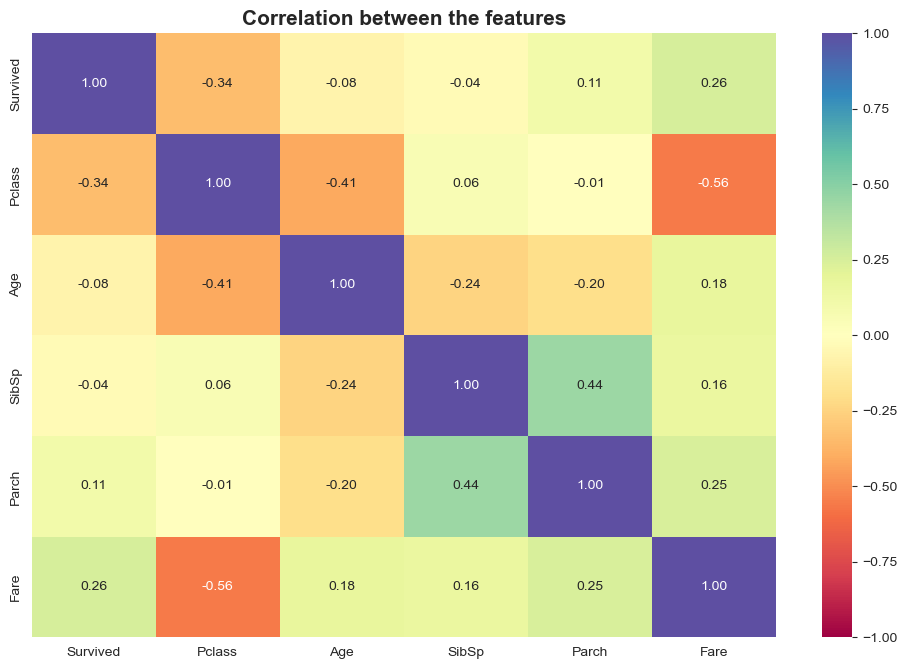

In [1062]:
# let's see the correlation between the features

# 
cols_list = full.select_dtypes(include=np.number).columns.tolist()
cols_list.remove('PassengerId')

plt.figure(figsize=(12, 8), dpi=100)

sns.heatmap(
    full[cols_list].corr(),
    annot=True,
    fmt='.2f',
    cmap='Spectral',
    vmax=1,
    vmin=-1
)

plt.title('Correlation between the features', fontsize=15, weight='bold')
plt.show()

1. The Pclass and the Age are negatively correlated. The older the passenger, the lower the class. And the lower class means the better class.
2. The Pclass and the Fare are negatively correlated. The higher the fare, the lower the class. This makes sense, because the 1st class is the most expensive class.
3. The Age and the SibSp are negatively correlated. The older the passenger, the less siblings/spouses the passenger has.
4. The Age and the Parch are negatively correlated. The older the passenger, the less parents/children the passenger has.
5. The Age and the Fare are positively correlated. The older the passenger, the higher the fare. We could find that teh Age and the Pclass are negatively correlated, and the Pclass and the Fare are negatively correlated. So, the Age and the Fare are positively correlated, which makes sense.
6. The SibSp and the Parch are positively correlated. The more siblings/spouses the passenger has, the more parents/children the passenger has. We could analyze the SibSp and the Parch together to make a new feature called 'Family Size'.
7. The SibSp and the Parch are all positively correlated with the Fare. The more siblings/spouses/parents/children the passenger has, the higher the fare.

**Pclass & Age**

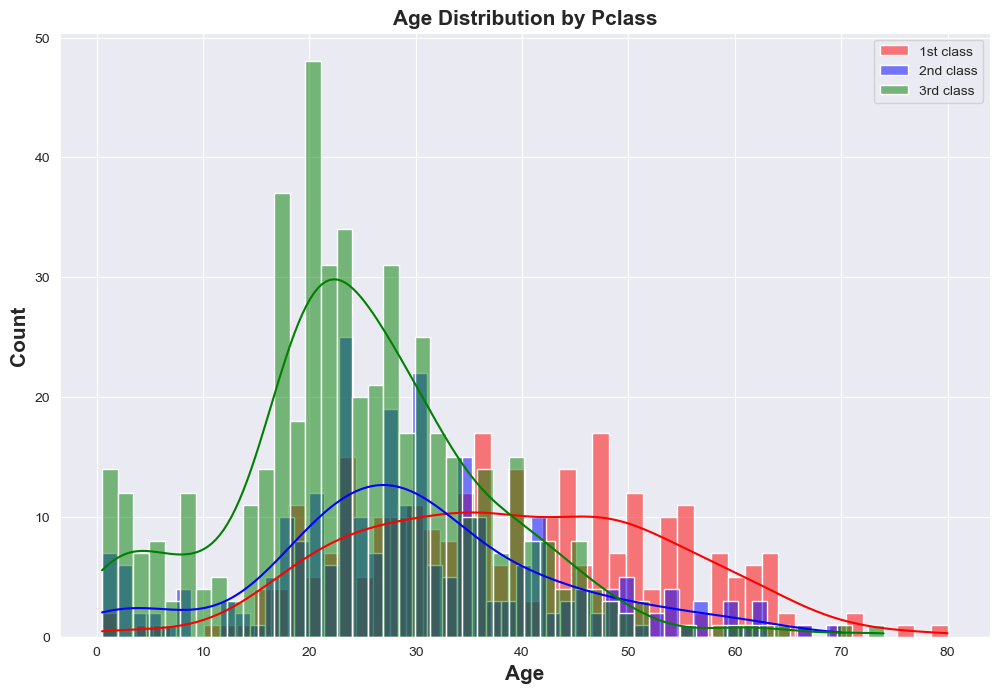

In [1063]:
plt.figure(figsize=(12, 8), dpi=100)

sns.histplot(full.loc[full.Pclass == 1, 'Age'], kde=True, color='red', label='1st class', bins=50)
sns.histplot(full.loc[full.Pclass == 2, 'Age'], kde=True, color='blue', label='2nd class', bins=50)
sns.histplot(full.loc[full.Pclass == 3, 'Age'], kde=True, color='green', label='3rd class', bins=50)

plt.xlabel('Age', fontsize=15, weight='bold')
plt.ylabel('Count', fontsize=15, weight='bold')

plt.title('Age Distribution by Pclass', fontsize=15, weight='bold')
plt.legend()

plt.show()

Firstly, the majority of the passengers are in the 3rd class, but there are still very obvious difference between the passengers' age in different classes.

Secondly, the 1st class passengers are older than the 2nd class passengers, and the 2nd class passengers are older than the 3rd class passengers.

Thirdly, the 1st class passengers are more evenly distributed than the 2nd and 3rd class passengers.

In [1064]:
# we group the age into 5 groups, and see the Pclass distribution in each group

full['Age_Group'] = pd.cut(full.Age, bins=[0, 12, 18, 40, 60, 100],
                           labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])

full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adult
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adult
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


Pclass        1    2    3   All
Age_Group                      
All         284  261  501  1046
Adult       134  169  323   626
Middle Age  108   44   42   194
Child         5   24   65    94
Teenager     16   18   65    99
Senior       21    6    6    33
----------------------DIVIDED-------------------------


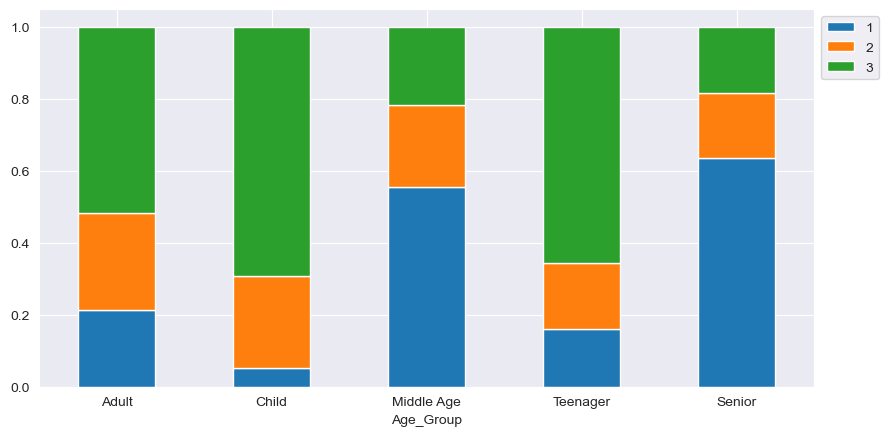

In [1065]:
stacked_barplot(full, 'Age_Group', 'Pclass')

From this stacked barplot, we could find that the majority of the children are in the 3rd class, and the majority of the teenagers are in the 2nd class, and the majority of the adults are in the 1st class.

**Pclass & Fare**

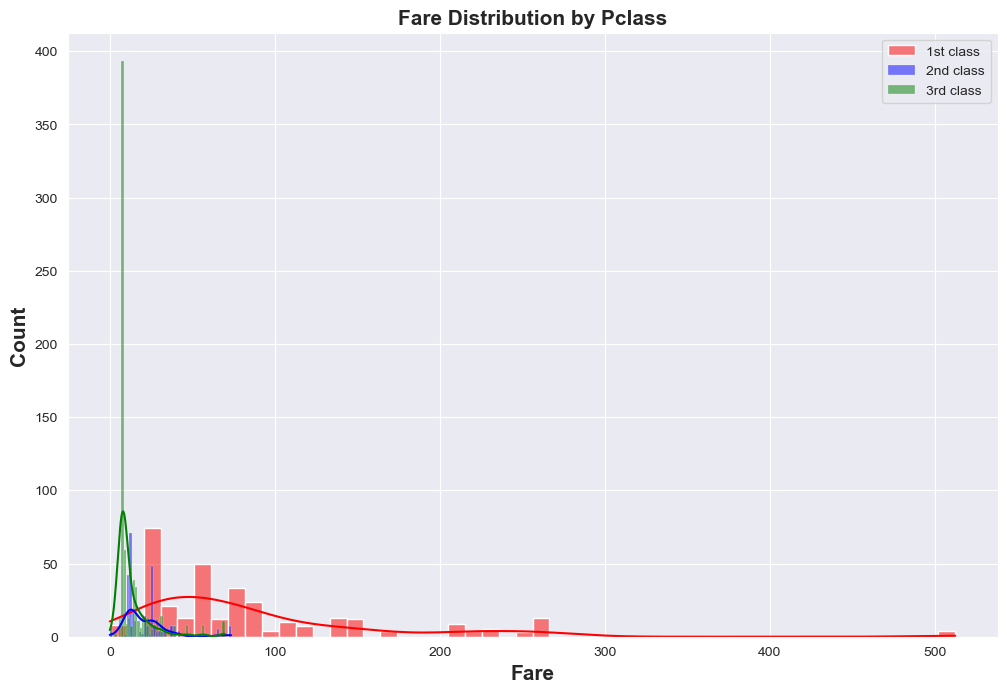

In [1066]:
# let's see the fare distribution in each class

plt.figure(figsize=(12, 8), dpi=100)

sns.histplot(full.loc[full.Pclass == 1, 'Fare'], kde=True, color='red', label='1st class', bins=50)
sns.histplot(full.loc[full.Pclass == 2, 'Fare'], kde=True, color='blue', label='2nd class', bins=50)
sns.histplot(full.loc[full.Pclass == 3, 'Fare'], kde=True, color='green', label='3rd class', bins=50)

plt.xlabel('Fare', fontsize=15, weight='bold')
plt.ylabel('Count', fontsize=15, weight='bold')

plt.title('Fare Distribution by Pclass', fontsize=15, weight='bold')
plt.legend()

The 1st class passengers have the highest fare, and the 2nd class passengers have the second highest fare, and the 3rd class passengers have the lowest fare.

**Pclass & SibSp**

Pclass    1    2    3   All
SibSp                      
All     323  277  709  1309
0       198  182  511   891
1       113   82  124   319
2         8   12   22    42
3         4    1   15    20
4         0    0   22    22
5         0    0    6     6
8         0    0    9     9
----------------------DIVIDED-------------------------


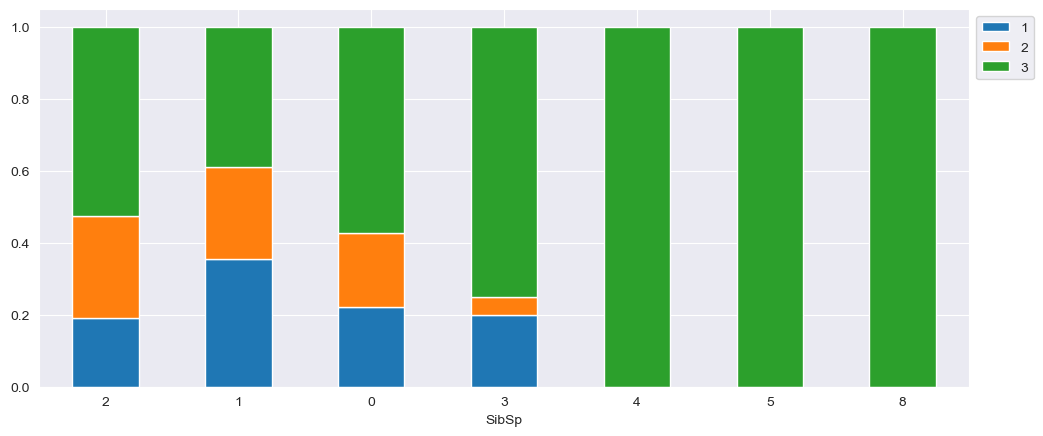

In [1067]:
stacked_barplot(full, 'SibSp', 'Pclass')

Under 3 siblings/spouses, the passengers would be various in different classes.
And the passengers with more than 3 siblings/spouses are all in the 3rd class, which means that the cost would be lower if the passengers have more siblings/spouses.


In [1068]:
full.loc[full.SibSp > 3, 'Pclass'].value_counts()

3    37
Name: Pclass, dtype: int64

**Pclass & Parch**

Pclass    1    2    3   All
Parch                      
All     323  277  709  1309
0       242  206  554  1002
1        50   43   77   170
2        27   25   61   113
3         4    3   17    24
----------------------DIVIDED-------------------------


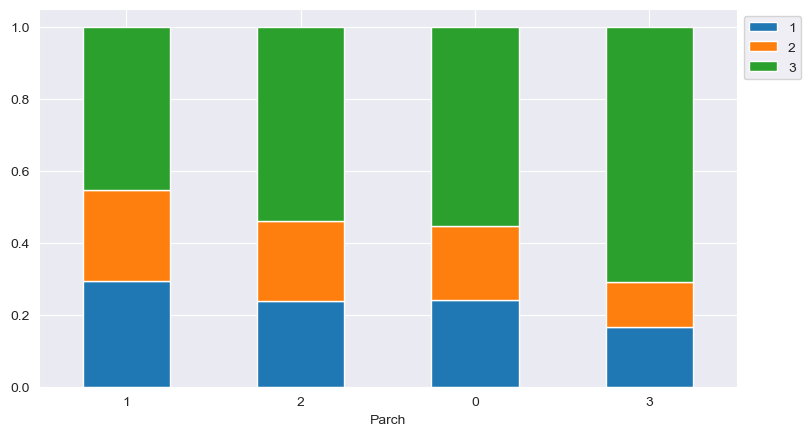

In [1069]:
stacked_barplot(full, 'Parch', 'Pclass')

The percentage of the 3rd class would be more than others if the passengers have more than 3 parents/children.

**Pclass & Family Size**

We would build a column called 'Family Size' to indicate the number of family members.

In [1070]:
family_size = full.SibSp + full.Parch + 1

full['Family_Size'] = family_size

full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Adult,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Adult,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN,1


Pclass         1    2    3   All
Family_Size                     
All          323  277  709  1309
1            160  158  472   790
2            104   52   79   235
3             39   45   75   159
4              9   20   18    47
5              7    1   24    32
6              4    1   14    19
7              0    0   12    12
8              0    0    6     6
11             0    0    9     9
----------------------DIVIDED-------------------------


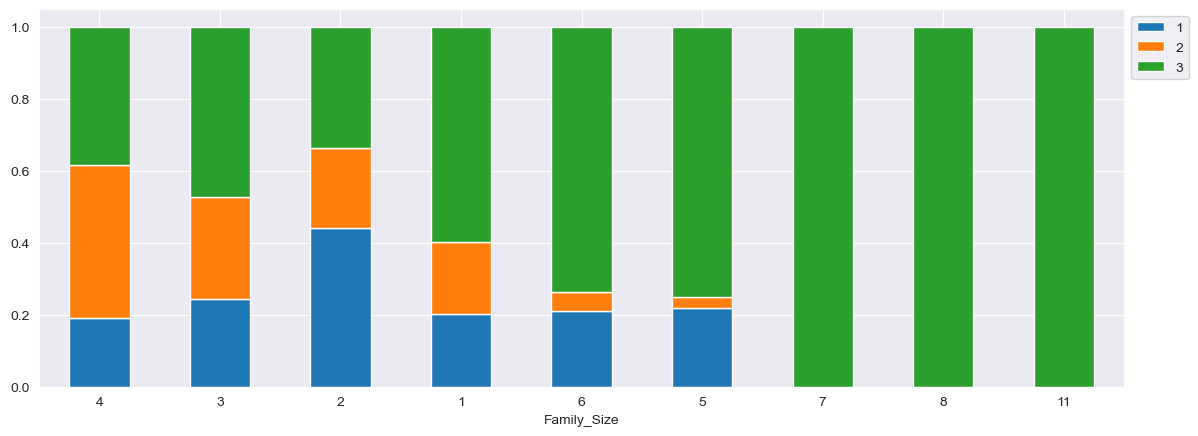

In [1071]:
stacked_barplot(full, 'Family_Size', 'Pclass')

The 3rd class percentage would increase if the family size is more than 5.

**Survived**

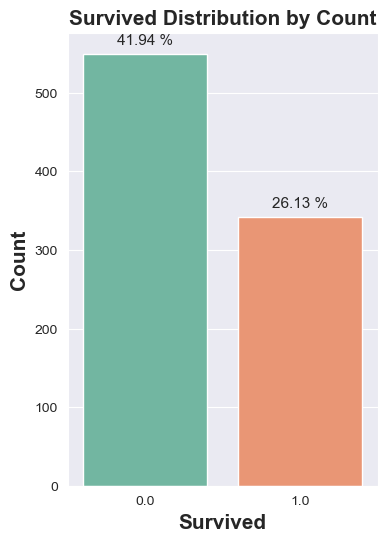

In [1072]:
labeled_barplot(full, 'Survived', perc=True)

In [1073]:
full.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

The majority of the passengers are not survived.

**Survived & Age**

Survived    0.0  1.0  All
Age_Group                
All         424  290  714
Adult       260  165  425
Middle Age   78   50  128
Child        29   40   69
Teenager     40   30   70
Senior       17    5   22
----------------------DIVIDED-------------------------


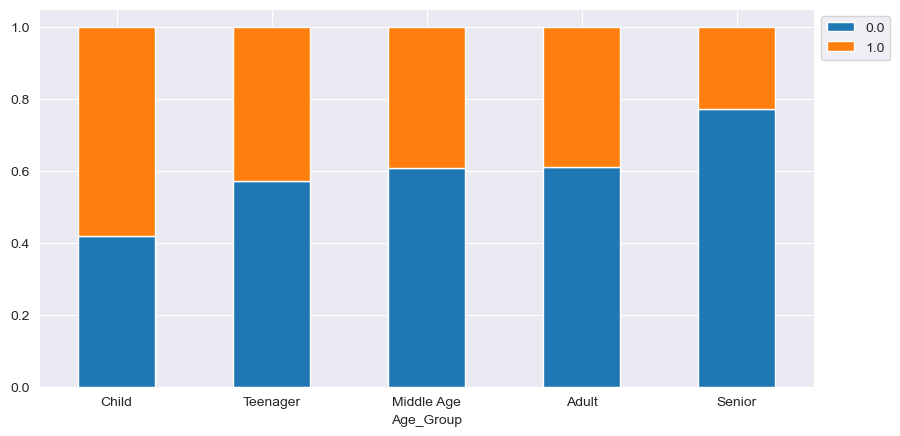

In [1074]:
stacked_barplot(full, 'Age_Group', 'Survived')

The children have the highest survival rate, and the Senior have the lowest survival rate.

In [1075]:
full.groupby('Age_Group')['Survived'].count()

Age_Group
Child          69
Teenager       70
Adult         425
Middle Age    128
Senior         22
Name: Survived, dtype: int64

**Survived & Pclass**

Survived  0.0  1.0  All
Pclass                 
All       549  342  891
1          80  136  216
3         372  119  491
2          97   87  184
----------------------DIVIDED-------------------------


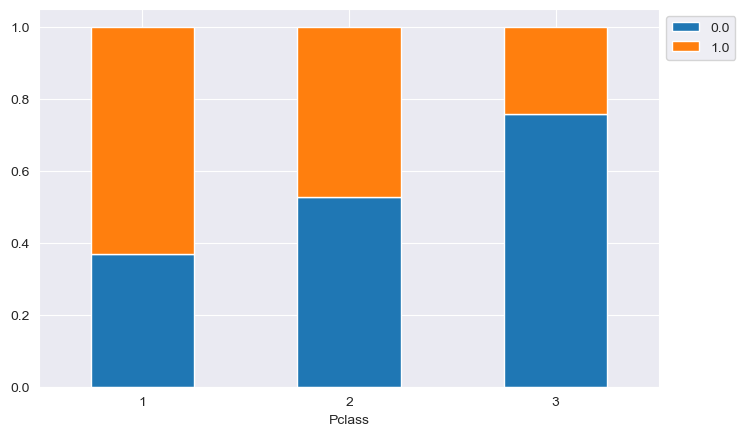

In [1076]:
stacked_barplot(full, 'Pclass', 'Survived')

The 1st class passengers have the highest survival rate, and the 3rd class passengers have the lowest survival rate.

** Survived & Embarked **

Survived  0.0  1.0  All
Embarked               
All       549  340  889
S         427  217  644
C          75   93  168
Q          47   30   77
----------------------DIVIDED-------------------------


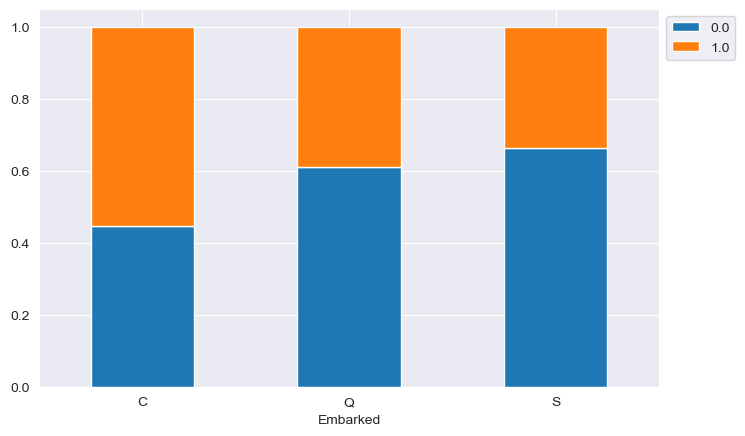

In [1077]:
stacked_barplot(full, 'Embarked', 'Survived')

The passengers who embarked from C have the highest survival rate, and the passengers who embarked from S have the lowest survival rate.

**Survived & Family Size**

Survived     0.0  1.0  All
Family_Size               
All          549  342  891
1            374  163  537
2             72   89  161
3             43   59  102
4             11   21   32
5             17    4   21
6             14    3   17
7              6    3    9
8              5    0    5
11             7    0    7
----------------------DIVIDED-------------------------


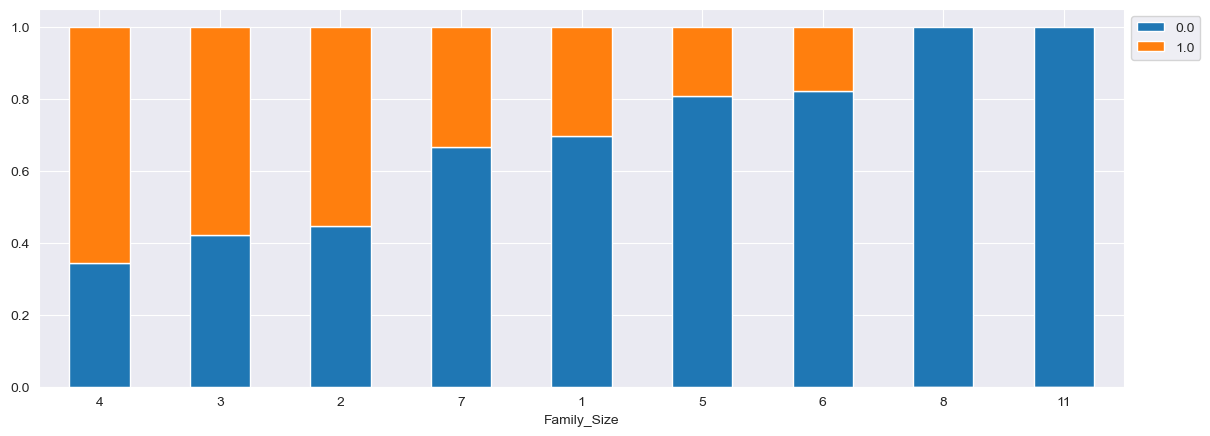

In [1078]:
stacked_barplot(full, 'Family_Size', 'Survived')

The passengers with 2-4 family members have the highest survival rate, and the passengers with more than 5 family members have the lowest survival rate.

**Survived & Sex**

Survived  0.0  1.0  All
Sex                    
All       549  342  891
female     81  233  314
male      468  109  577
----------------------DIVIDED-------------------------


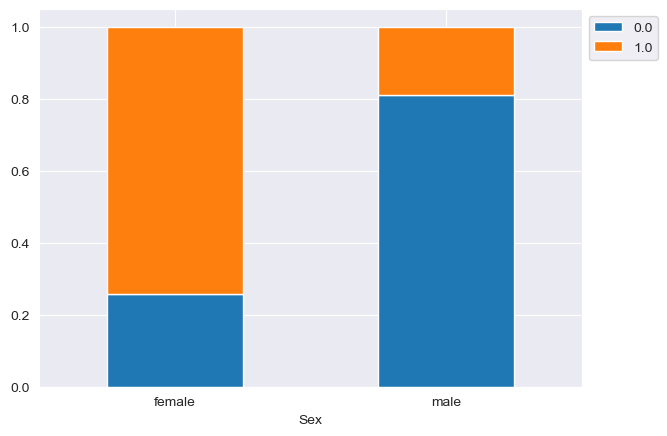

In [1079]:
stacked_barplot(full, 'Sex', 'Survived')

Female is more likely to be survived.

## Data Preprocessing

### Missing Values

In [1080]:
# check the missing values
full.isnull().sum().where(lambda x: x > 0).dropna().sort_values(ascending=False)

Cabin        1014.0
Survived      418.0
Age           263.0
Age_Group     263.0
Embarked        2.0
Fare            1.0
dtype: float64

In [1081]:
# The Cabin column has too many missing values, we can drop this column
full.drop(['Cabin'], inplace=True, axis=1)

In [1082]:
# The Embarked column has 2 missing values, we can fill the missing values with the mode
full['Embarked'].fillna(full['Embarked'].mode()[0], inplace=True)

In [1083]:
# The Fare column has 1 missing value, we can fill the missing value with the median
full['Fare'].fillna(full['Fare'].median(), inplace=True)

In [1084]:
# check the missing values
full.isnull().sum().where(lambda x: x > 0).dropna().sort_values(ascending=False)

Survived     418.0
Age          263.0
Age_Group    263.0
dtype: float64

The Age is a very important feature, we cannot drop this column. I choose to use the Random Forest to fill the missing values.

In [1085]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Embarked     1309 non-null   object  
 11  Age_Group    1046 non-null   category
 12  Family_Size  1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB


In [1086]:
age_RFM = full[
    ['Parch', 'SibSp', 'Pclass', 'Age', 'Sex', 'Embarked', 'Fare', 'Family_Size']]

In [1087]:
age_RFM = pd.get_dummies(age_RFM)

In [1088]:
age_RFM

,Parch,SibSp,Pclass,Age,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,3,22.0,7.2500,2,0,1,0,0,1
1,0,1,1,38.0,71.2833,2,1,0,1,0,0
2,0,0,3,26.0,7.9250,1,1,0,0,0,1
3,0,1,1,35.0,53.1000,2,1,0,0,0,1
4,0,0,3,35.0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,0,0,3,NaN,8.0500,1,0,1,0,0,1
1305,0,0,1,39.0,108.9000,1,1,0,1,0,0
1306,0,0,3,38.5,7.2500,1,0,1,0,0,1
1307,0,0,3,NaN,8.0500,1,0,1,0,0,1


In [1089]:
# Train, Test split

train = age_RFM[age_RFM.Age.notnull()]
test = age_RFM[age_RFM.Age.isnull()]

X_train = train.drop(['Age'], axis=1)
y_train = train['Age']

X_test = test.drop(['Age'], axis=1)
y_test = test['Age']

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1046, 10) (1046,)
(263, 10) (263,)


In [1090]:
rfm_missing_age = RandomForestRegressor(n_estimators=100, random_state=42)

In [1091]:
rfm_missing_age.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1092]:
# predict the missing values
y_pred = rfm_missing_age.predict(X_test)

y_pred

array([27.03846667, 32.12571753, 28.52578914, 27.25699892, 21.50042857,
       27.42671478, 41.9       , 26.50837021, 23.99450343, 32.32895238,
       29.74502185, 32.17116667, 26.50837021, 21.58870238, 38.2795    ,
       35.1065    ,  6.82141667, 27.42671478, 29.74502185, 22.33340376,
       29.74502185, 29.74502185, 27.42671478, 27.68974669, 26.38280159,
       29.74502185, 39.9885912 , 21.82791667, 23.72      , 31.57488753,
       23.9791473 , 14.12130952, 25.2625    , 47.63664683, 15.10497619,
       15.6045    , 31.283     , 49.60666667, 25.93952381, 39.9885912 ,
       26.50837021, 14.12130952, 35.33135707, 27.42671478, 14.50483333,
       21.37333333, 16.87704762, 25.93952381, 31.68170571, 39.99366667,
       39.9885912 , 26.50837021, 46.22059921, 26.50837021, 37.35828457,
       48.14148088, 35.1065    , 44.10530556, 26.50837021, 26.56145238,
       38.8420625 , 29.74502185, 34.85      , 14.12130952, 23.19902381,
       35.577     , 27.42671478, 22.94316667, 48.68966667, 27.25

In [1093]:
# fill the missing values
full.loc[full.Age.isnull(), 'Age'] = y_pred

In [1094]:
full.isnull().sum().where(lambda x: x > 0).dropna().sort_values(ascending=False)

Survived     418.0
Age_Group    263.0
dtype: float64

In [1095]:
full['Age_Group'] = pd.cut(full.Age, bins=[0, 12, 18, 40, 60, 100],
                           labels=['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior'])

In [1096]:
full.isnull().sum().where(lambda x: x > 0).dropna().sort_values(ascending=False)

Survived    418.0
dtype: float64

### Outliers

In [1097]:
numerical_cols = full.select_dtypes(include=np.number).columns.tolist()

numerical_cols.remove('PassengerId')

numerical_cols

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size']

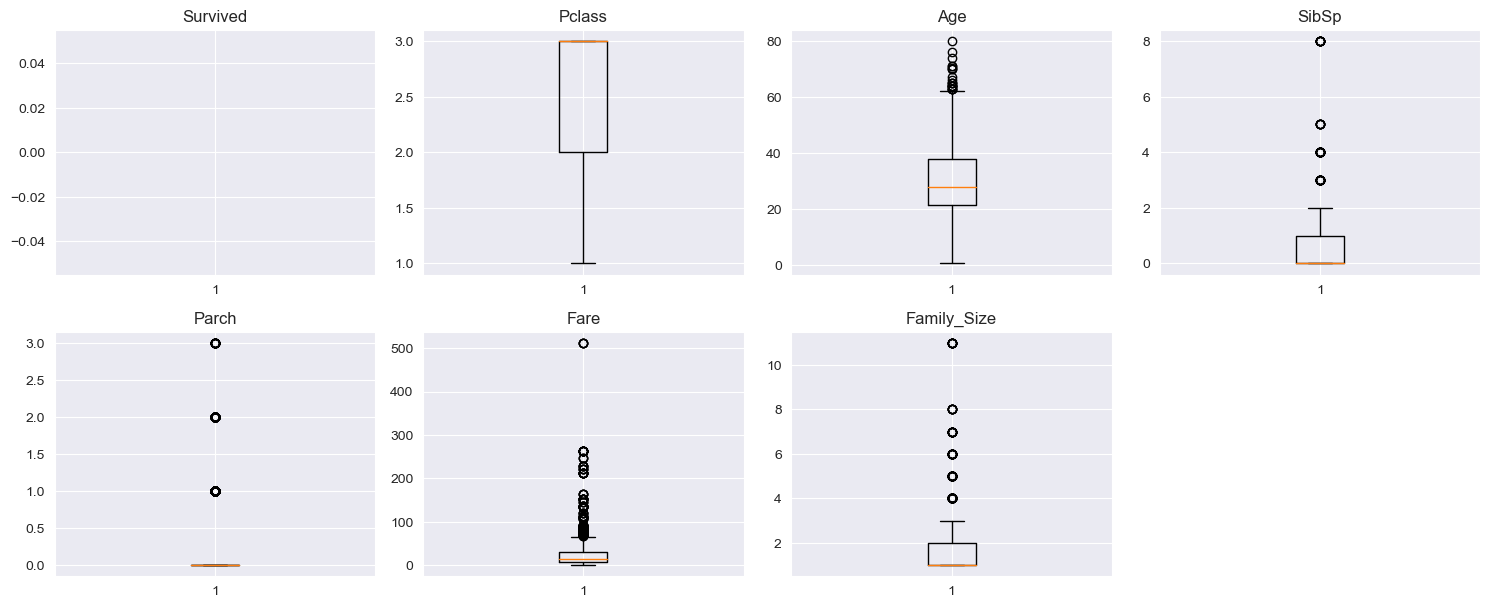

In [1098]:
plt.figure(figsize=(15, 12), dpi=100)

data = full[numerical_cols]

for i in numerical_cols:
    plt.subplot(4, 4, numerical_cols.index(i) + 1)
    plt.boxplot(data[i], whis=1.5)
    plt.tight_layout()
    plt.title(i)

plt.show()

1. Survived, Pclass are categorical features, we don't need to check the outliers.
2. The Age has some outliers, but we don't need to remove these outliers.
3. The SibSp has some outliers, but we don't need to remove these outliers.
4. The Parch is also a categorical feature, we don't need to check the outliers.
5. The Fare has some outliers, there is only one outlier, we would check later.

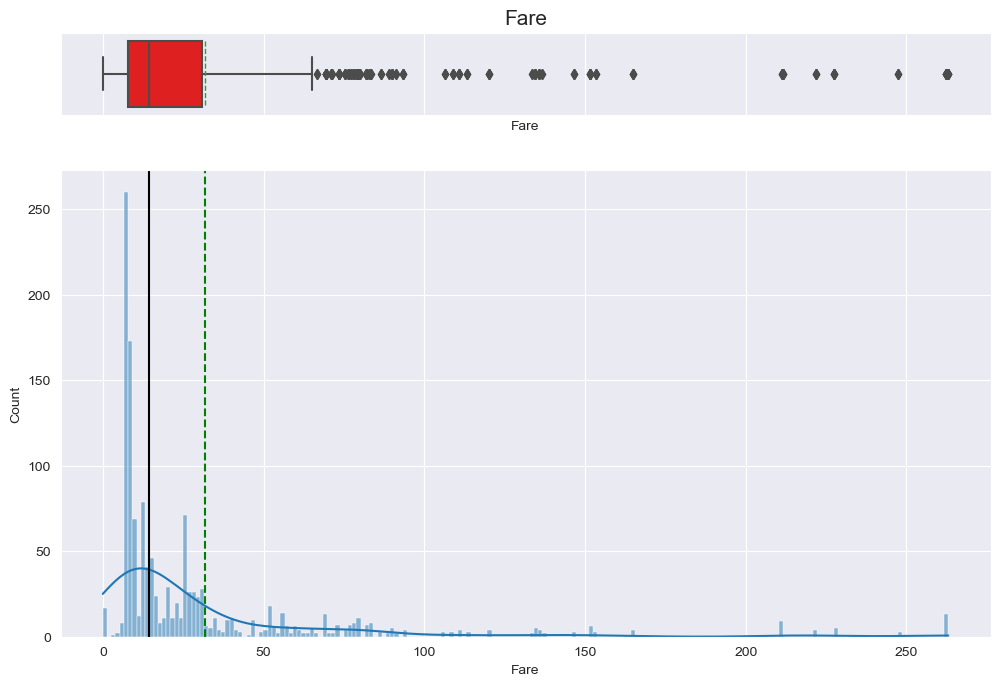

In [1099]:
histogram_boxplot(full.loc[full['Fare'] < 500], 'Fare', kde=True, bins=200)

In [1100]:
# We are going to set the IQR to 1.5, and remove the outliers

Q1 = full.Fare.quantile(0.25)
Q3 = full.Fare.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-27.172999999999995 66.34379999999999


## Model Building

The Classification Models we are going to use:
1. Logistic Regression
2. Random Forest
3. XGBoost

### Logistic Regression

In [1101]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   object  
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Embarked     1309 non-null   object  
 11  Age_Group    1309 non-null   category
 12  Family_Size  1309 non-null   int64   
dtypes: category(1), float64(3), int64(5), object(4)
memory usage: 124.3+ KB


In [1102]:
full_data = full.drop(['PassengerId', 'Name', 'Ticket', 'Age_Group'], axis=1)

full_data['Age'] = full_data['Age'].astype(int)

In [1103]:
full_data = pd.get_dummies(full_data)

In [1104]:
full_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,22,1,0,7.2500,2,0,1,0,0,1
1,1.0,1,38,1,0,71.2833,2,1,0,1,0,0
2,1.0,3,26,0,0,7.9250,1,1,0,0,0,1
3,1.0,1,35,1,0,53.1000,2,1,0,0,0,1
4,0.0,3,35,0,0,8.0500,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,29,0,0,8.0500,1,0,1,0,0,1
1305,NaN,1,39,0,0,108.9000,1,1,0,1,0,0
1306,NaN,3,38,0,0,7.2500,1,0,1,0,0,1
1307,NaN,3,29,0,0,8.0500,1,0,1,0,0,1


In [1105]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Age          1309 non-null   int64  
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Fare         1309 non-null   float64
 6   Family_Size  1309 non-null   int64  
 7   Sex_female   1309 non-null   uint8  
 8   Sex_male     1309 non-null   uint8  
 9   Embarked_C   1309 non-null   uint8  
 10  Embarked_Q   1309 non-null   uint8  
 11  Embarked_S   1309 non-null   uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 78.1 KB


In [1106]:
# import the OLS model

import statsmodels.api as sm

# Train, Test split
X = full_data[full_data.Survived.notnull()].drop(['Survived'], axis=1)
y = full_data[full_data.Survived.notnull()]['Survived']

X_pred = full_data[full_data.Survived.isnull()].drop(['Survived'], axis=1)

X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 12) (712,)
(179, 12) (179,)


In [1107]:
model_logistic = sm.Logit(y_train, X_train.astype(float))

result_logistic = model_logistic.fit()

print(result_logistic.summary())

Optimization terminated successfully.
         Current function value: 0.446814
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Tue, 26 Sep 2023   Pseudo R-squ.:                  0.3253
Time:                        15:46:40   Log-Likelihood:                -318.13
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 1.456e-61
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.6925   5.92e+06   2.86e-07      1.000   -1.16e+07    1.16e+07
Pclass         -1.0652   

#### Model evaluation criterion

#### Model can make wrong predictions as:

* Predicting a booking as canceled when it is not canceled (False Positive)
* Predicting a booking as not canceled when it is canceled (False Negative)

#### Which case is more important? 

Actually, in order to improve the accuracy of the model, we need to reduce the number of false positives and false negatives.

#### How to reduce the losses?

We use the confusion matrix to evaluate the model. And focus on the F1 score.


#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot the confusion matrix.

In [1108]:
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):
    """
    Model performance for classification models
    
    Args:
        model: statsmodels model
        predictors: dataframe, predictors
        target: dataframe, target
        threshold: float, threshold for classification
    """

    pred_probs = model.predict(predictors) > threshold

    pred = np.round(pred_probs)

    accuracy = accuracy_score(target, pred)
    precision = precision_score(target, pred)
    recall = recall_score(target, pred)
    f1 = f1_score(target, pred)

    df_pred_scores = pd.DataFrame(
        {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        },
        index=[0]
    )

    return df_pred_scores

In [1109]:
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    Confusion matrix for classification models
    
    Args:
        model: statsmodels model
        predictors: dataframe, predictors
        target: dataframe, target
        threshold: float, threshold for classification
    """

    pred_probs = model.predict(predictors) > threshold
    cm = confusion_matrix(target, pred_probs)

    labels = np.asarray(
        [
            ['{0:0.0f}'.format(item) + "\n {:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4), dpi=100)

    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

    plt.xlabel('Predicted', fontsize=15, weight='bold')
    plt.ylabel('Actual', fontsize=15, weight='bold')

    plt.show()


#### Model performance on the training set

In [1110]:
logit_model_default_perf_train = model_performance_classification_statsmodels(
    result_logistic,
    X_train,
    y_train
)

logit_model_default_perf_train

,accuracy,precision,recall,f1
0,0.800562,0.758197,0.690299,0.722656


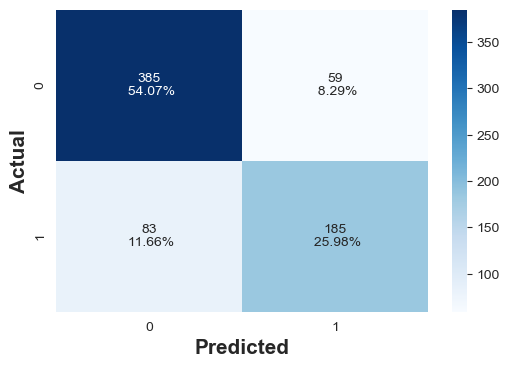

In [1111]:
confusion_matrix_statsmodels(result_logistic, X_train, y_train)

Test set performance

In [1112]:
logit_model_default_perf_test = model_performance_classification_statsmodels(result_logistic, X_test, y_test)
logit_model_default_perf_test

,accuracy,precision,recall,f1
0,0.815642,0.797101,0.743243,0.769231


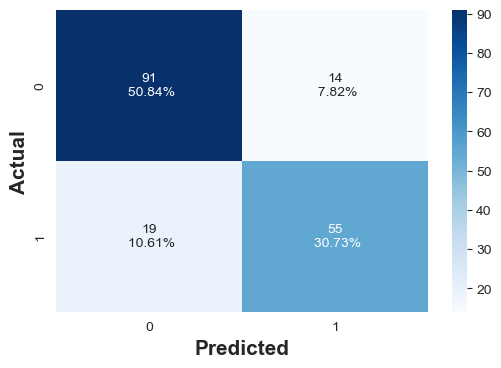

In [1113]:
confusion_matrix_statsmodels(result_logistic, X_test, y_test)

#### Assumption Check
1. Linear relationship between the logit of the outcome and the predictor variables
2. Independent observations
3. Low or no multicollinearity between the predictor variables and the logit of the outcome

**Multicollinearity**

In [1114]:
def check_VIF(predictors):
    """
    Check the VIF of the predictors
    
    Args:
        predictors: dataframe, predictors
    """

    vif = pd.DataFrame()

    vif['Features'] = predictors.columns

    vif['VIF'] = [variance_inflation_factor(predictors.values, i) for i in range(predictors.shape[1])]

    return vif.sort_values(by='VIF', ascending=False)

In [1115]:
check_VIF(X_train)

/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF
3,SibSp,inf
4,Parch,inf
6,Family_Size,inf
7,Sex_female,inf
8,Sex_male,inf
9,Embarked_C,inf
10,Embarked_Q,inf
11,Embarked_S,inf
1,Pclass,1.823270
5,Fare,1.641000


The VIF of the Fare is too high, we can drop this column.

In [1116]:
X = X.drop(['SibSp', 'Parch'], axis=1)
X = X.drop(['Embarked_S'], axis=1)
X = X.drop(['Sex_female'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 8) (712,)
(179, 8) (179,)


In [1117]:
model_logistic_after_VIF = sm.Logit(y_train, X_train.astype(float))
result_logistic_after_VIf = model_logistic_after_VIF.fit()

print(result_logistic_after_VIf.summary())

Optimization terminated successfully.
         Current function value: 0.447995
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Tue, 26 Sep 2023   Pseudo R-squ.:                  0.3236
Time:                        15:46:40   Log-Likelihood:                -318.97
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 4.838e-62
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.8779      0.642      7.593      0.000       3.619       6.137
Pclass         -1.0591    

In [1118]:
check_VIF(X_train)

,Features,VIF
0,const,36.547844
1,Pclass,1.822817
3,Fare,1.631347
2,Age,1.387152
4,Family_Size,1.275984
6,Embarked_C,1.116432
5,Sex_male,1.092991
7,Embarked_Q,1.073030


The VIF of the train set is not high, we can use this model to predict the test set.

#### Feature Selection

Dropping the features with high p-values

We can drop the features with high p-values, and retrain the model.

In [1119]:
cols = X_train.columns.tolist()

max_p_value = 1

while len(cols) > 0:
    x_train_aux = X_train[cols]

    model_logistic_aux = sm.Logit(y_train, x_train_aux.astype(float))

    result_logistic_aux = model_logistic_aux.fit(disp=False)

    max_p_value = result_logistic_aux.pvalues.max()

    feature_max_p_value = result_logistic_aux.pvalues.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_max_p_value)
    else:
        break

selected_features = cols

print('Selected features: ', selected_features)

Selected features:  ['const', 'Pclass', 'Age', 'Family_Size', 'Sex_male']


In [1120]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [1121]:
model_logistic_selected = sm.Logit(y_train, X_train_selected.astype(float))
result_logistic_selected = model_logistic_selected.fit(disp=False)

print(result_logistic_selected.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Tue, 26 Sep 2023   Pseudo R-squ.:                  0.3192
Time:                        15:46:40   Log-Likelihood:                -321.04
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 6.597e-64
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.3204      0.589      9.029      0.000       4.165       6.475
Pclass         -1.1541      0.138     -8.333      0.000      -1.426      -0.883
Age            -0.0367      0.009     -4.205    

In [1122]:
# Evaluation
logit_after_feature_selection_perf_train = model_performance_classification_statsmodels(
    result_logistic_selected,
    X_train_selected,
    y_train
)

logit_after_feature_selection_perf_train

,accuracy,precision,recall,f1
0,0.799157,0.759336,0.682836,0.719057


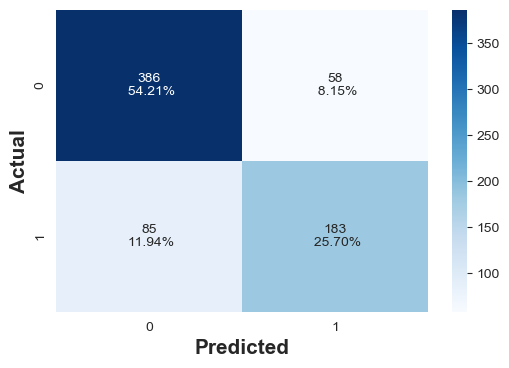

In [1123]:
confusion_matrix_statsmodels(result_logistic_selected, X_train_selected, y_train)

In [1124]:
logit_after_feature_selection_perf_test = model_performance_classification_statsmodels(
    result_logistic_selected,
    X_test_selected,
    y_test
)

logit_after_feature_selection_perf_test

,accuracy,precision,recall,f1
0,0.826816,0.820896,0.743243,0.780142


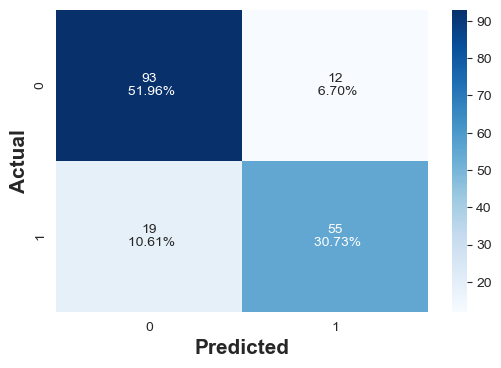

In [1125]:
confusion_matrix_statsmodels(result_logistic_selected, X_test_selected, y_test)

We could see that the F1 score increased from 0.74 to 0.78

#### ROC Curve
ROC AUC curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

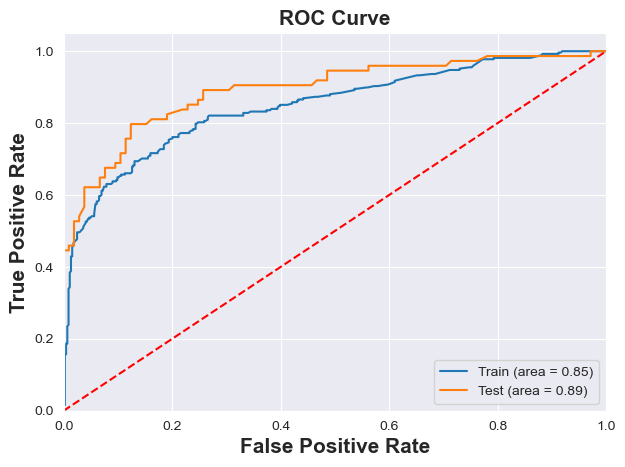

In [1126]:
# plot the ROC curve

logit_roc_auc_train = roc_auc_score(y_train, result_logistic_selected.predict(X_train_selected))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, result_logistic_selected.predict(X_train_selected))

logit_roc_auc_test = roc_auc_score(y_test, result_logistic_selected.predict(X_test_selected))

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, result_logistic_selected.predict(X_test_selected))

plt.figure(figsize=(7, 5), dpi=100)

plt.plot(fpr_train, tpr_train, label='Train (area = %0.2f)' % logit_roc_auc_train)
plt.plot(fpr_test, tpr_test, label='Test (area = %0.2f)' % logit_roc_auc_test)

plt.plot([0, 1], [0, 1], 'r--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate', fontsize=15, weight='bold')
plt.ylabel('True Positive Rate', fontsize=15, weight='bold')

plt.title('ROC Curve', fontsize=15, weight='bold')

plt.legend(loc='lower right')

plt.show()

In [1127]:
# calculate the AUC

best_threshold = thresholds_test[np.argmax(tpr_test - fpr_test)]

print('Train AUC: ', logit_roc_auc_train)
print('Test AUC: ', logit_roc_auc_test)
print('The best threshold: ', best_threshold)

Train AUC:  0.8477628748151136
Test AUC:  0.8924710424710424
The best threshold:  0.4734471065163765


The AUC of the both train set and test set are high, which means that the model is good.

**Model Evaluation**

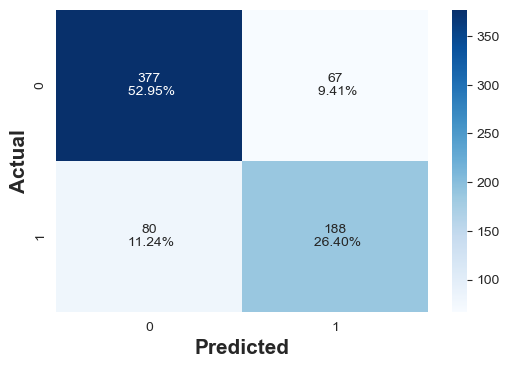

In [1128]:
confusion_matrix_statsmodels(result_logistic_selected, X_train_selected, y_train, threshold=best_threshold)

In [1129]:
logit_roc_model_train_perf_threshold = model_performance_classification_statsmodels(
    result_logistic_selected,
    X_train_selected,
    y_train,
    threshold=best_threshold
)

print('The model performance on the train set with the best threshold:')
logit_roc_model_train_perf_threshold

The model performance on the train set with the best threshold:


,accuracy,precision,recall,f1
0,0.793539,0.737255,0.701493,0.718929


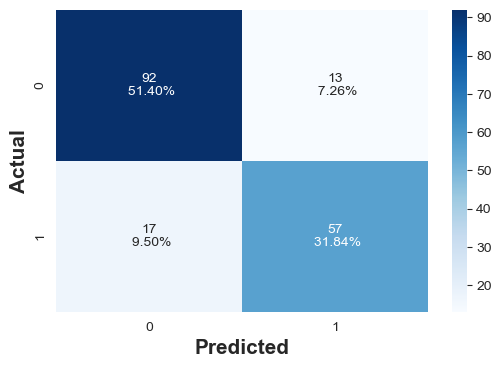

In [1130]:
# Evaluation on the test set

confusion_matrix_statsmodels(result_logistic_selected, X_test_selected, y_test, threshold=best_threshold)

In [1131]:
logit_roc_model_test_perf_threshold = model_performance_classification_statsmodels(
    result_logistic_selected,
    X_test_selected,
    y_test,
    threshold=best_threshold
)

print('The model performance on the test set with the best threshold:')
logit_roc_model_test_perf_threshold

The model performance on the test set with the best threshold:


,accuracy,precision,recall,f1
0,0.832402,0.814286,0.77027,0.791667


The accuracy increased.

**We can also use the Precision-Recall Curve to evaluate the model.**

In [1155]:
y_score = result_logistic_selected.predict(X_test_selected)

"""
precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None, drop_intermediate=True)
"""

prec, rec, tre = precision_recall_curve(y_test, y_score)


def plot_prec_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Plot the precision and recall scores against the threshold
    
    Args:
        precisions: array, precision scores
        recalls: array, recall scores
        thresholds: array, thresholds
    """

    plt.figure(figsize=(12, 8), dpi=100)

    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')

    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')

    plt.xlabel('Threshold', fontsize=15, weight='bold')
    plt.title('Precision and Recall Scores vs Threshold', fontsize=15, weight='bold')

    # caulculate the best threshold makes the absolute difference between precision and recall as small as possible
    optimal_idx = np.argmin(np.abs(precisions - recalls))
    best_threshold = thresholds[optimal_idx]

    plt.plot(best_threshold, precisions[optimal_idx], 'ro')

    plt.annotate(
        f'Best Threshold: {round(best_threshold, 2)}',
        xy=(best_threshold, precisions[optimal_idx]),
        xytext=(best_threshold + 0.1, precisions[optimal_idx] + 0.05),
        fontsize=10
    )

    plt.legend(loc='lower left', frameon=False)
    plt.show()
    print('The best threshold: ', best_threshold)

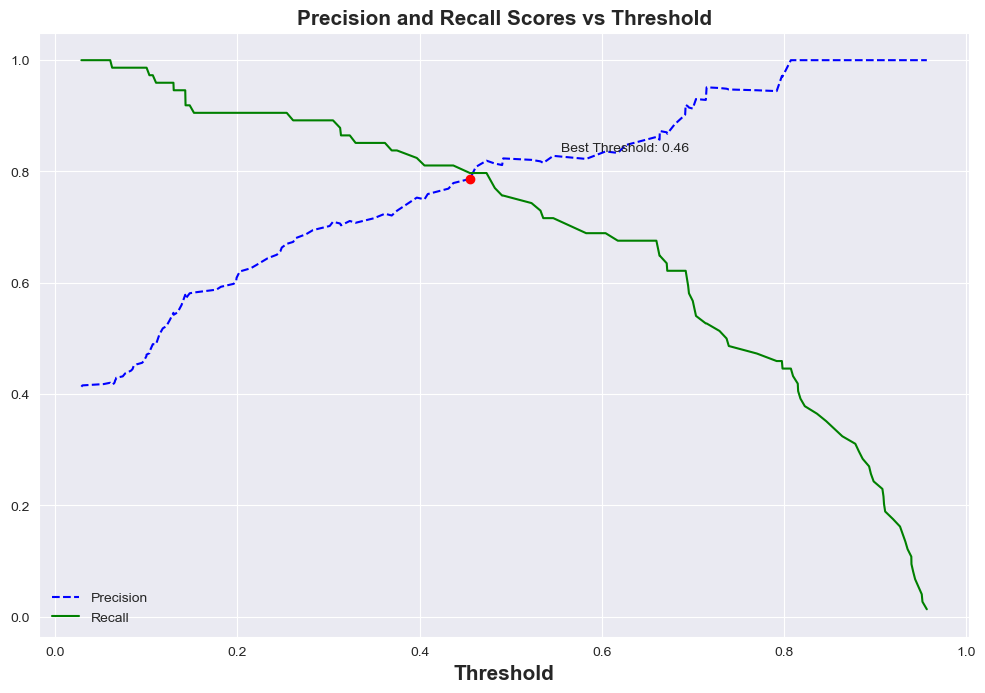

The best threshold:  0.4551772220989523


In [1156]:
plot_prec_recall_vs_threshold(prec, rec, tre)

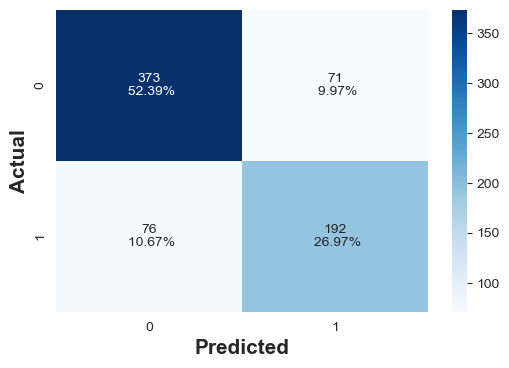

In [1134]:
# use the best threshold from the Precision-Recall Curve to evaluate the model

best_threshold = 0.455

confusion_matrix_statsmodels(result_logistic_selected, X_train_selected, y_train, threshold=best_threshold)

In [1135]:
logit_pre_rec_model_train_perf_threshold_train = model_performance_classification_statsmodels(
    result_logistic_selected,
    X_train_selected,
    y_train,
    threshold=best_threshold
)

print('The model performance on the train set with the best threshold:')
logit_pre_rec_model_train_perf_threshold_train

The model performance on the train set with the best threshold:


,accuracy,precision,recall,f1
0,0.793539,0.730038,0.716418,0.723164


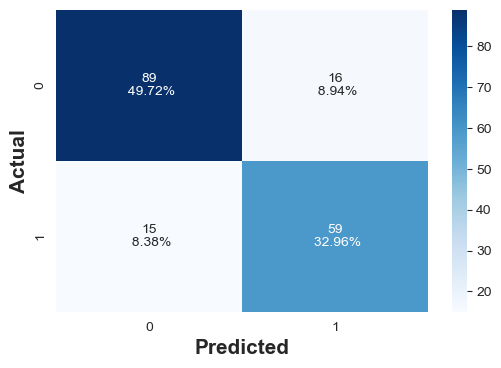

In [1136]:
# test set

confusion_matrix_statsmodels(result_logistic_selected, X_test_selected, y_test, threshold=best_threshold)

In [1137]:
logit_pre_rec_model_test_perf_threshold_test = model_performance_classification_statsmodels(
    result_logistic_selected,
    X_test_selected,
    y_test,
    threshold=best_threshold
)

print('The model performance on the test set with the best threshold:')
logit_pre_rec_model_test_perf_threshold_test

The model performance on the test set with the best threshold:


,accuracy,precision,recall,f1
0,0.826816,0.786667,0.797297,0.791946


#### Model Performance Imporvement Summary

In [1138]:
models_train_comp_df = pd.concat(
    [
        logit_model_default_perf_train,
        logit_after_feature_selection_perf_train,
        logit_roc_model_train_perf_threshold,
        logit_pre_rec_model_train_perf_threshold_train
    ],
    axis=0
)

models_train_comp_df.index = [
    'Logistic Model Default Train',
    'Logistic Model After Feature Selection Train',
    'Logistic Model ROC Train',
    'Logistic Model Precision-Recall Train'
]

models_train_comp_df.T

,Logistic Model Default Train,Logistic Model After Feature Selection Train,Logistic Model ROC Train,Logistic Model Precision-Recall Train
accuracy,0.800562,0.799157,0.793539,0.793539
precision,0.758197,0.759336,0.737255,0.730038
recall,0.690299,0.682836,0.701493,0.716418
f1,0.722656,0.719057,0.718929,0.723164


In [1142]:
models_test_comp_df = pd.concat(
    [
        logit_model_default_perf_test,
        logit_after_feature_selection_perf_test,
        logit_roc_model_test_perf_threshold,
        logit_pre_rec_model_test_perf_threshold_test
    ],
    axis=0
)

models_test_comp_df.index = [
    'Logistic Model Default Test',
    'Logistic Model After Feature Selection Test',
    'Logistic Model ROC Test',
    'Logistic Model Precision-Recall Test'
]

models_test_comp_df.T

,Logistic Model Default Test,Logistic Model After Feature Selection Test,Logistic Model ROC Test,Logistic Model Precision-Recall Test
accuracy,0.815642,0.826816,0.832402,0.826816
precision,0.797101,0.820896,0.814286,0.786667
recall,0.743243,0.743243,0.770270,0.797297
f1,0.769231,0.780142,0.791667,0.791946


We could find that the best model would be the Logistic Model After Feature Selection and selected the threshold from the ROC Curve & the Precision-Recall Curve.

But actually after selecting the threshold from the ROC Curve & the Precision-Recall Curve, the performance of the models are almost the same.

### Random Forest

In [1157]:
full_data_rfm = full.drop(['PassengerId', 'Name', 'Ticket', 'Age_Group'], axis=1)
full_data_rfm

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
0,0.0,3,male,22.000000,1,0,7.2500,S,2
1,1.0,1,female,38.000000,1,0,71.2833,C,2
2,1.0,3,female,26.000000,0,0,7.9250,S,1
3,1.0,1,female,35.000000,1,0,53.1000,S,2
4,0.0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,29.745022,0,0,8.0500,S,1
1305,NaN,1,female,39.000000,0,0,108.9000,C,1
1306,NaN,3,male,38.500000,0,0,7.2500,S,1
1307,NaN,3,male,29.745022,0,0,8.0500,S,1


In [1158]:
full_data_rfm = pd.get_dummies(full_data_rfm)

In [1160]:
full_data_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    float64
 1   Pclass       1309 non-null   int64  
 2   Age          1309 non-null   float64
 3   SibSp        1309 non-null   int64  
 4   Parch        1309 non-null   int64  
 5   Fare         1309 non-null   float64
 6   Family_Size  1309 non-null   int64  
 7   Sex_female   1309 non-null   uint8  
 8   Sex_male     1309 non-null   uint8  
 9   Embarked_C   1309 non-null   uint8  
 10  Embarked_Q   1309 non-null   uint8  
 11  Embarked_S   1309 non-null   uint8  
dtypes: float64(3), int64(4), uint8(5)
memory usage: 78.1 KB


In [1161]:
# Train, Test split

full_data_rfm_train = full_data_rfm[full_data_rfm.Survived.notnull()]

X_train, X_test, y_train, y_test = train_test_split(
    full_data_rfm_train.drop(['Survived'], axis=1),
    full_data_rfm_train['Survived'],
    test_size=0.2,
    random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(712, 11) (712,)
(179, 11) (179,)


In [1162]:
# build the model
rfm_default = RandomForestClassifier(n_estimators=100, random_state=42)

rfm_default.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1165]:
# Evaluation on the train set
rfm_default_perf_train = model_performance_classification_statsmodels(rfm_default, X_train, y_train)
rfm_default_perf_train

,accuracy,precision,recall,f1
0,0.980337,0.988462,0.958955,0.973485


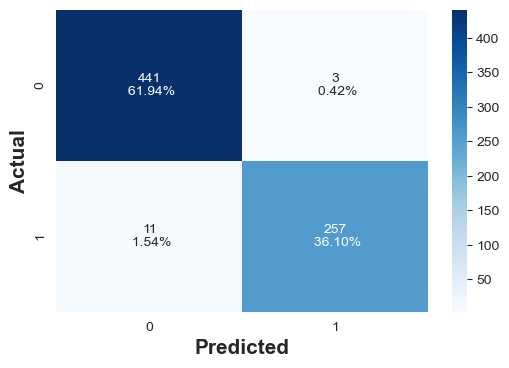

In [1166]:
confusion_matrix_statsmodels(rfm_default, X_train, y_train)

We could find that the model is very good on the train set.
Let's figure out whether it is overfitting.

In [1167]:
# Evaluation on the test set
rfm_default_perf_test = model_performance_classification_statsmodels(rfm_default, X_test, y_test)
rfm_default_perf_test

,accuracy,precision,recall,f1
0,0.832402,0.797297,0.797297,0.797297


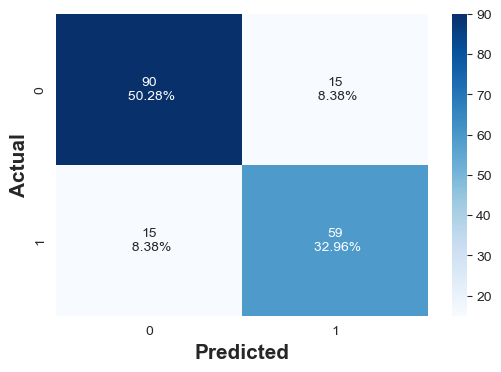

In [1168]:
confusion_matrix_statsmodels(rfm_default, X_test, y_test)

The model is overfitting.

#### Hyperparameter Tuning

In [1170]:
# build the model

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}

scorer = metrics.make_scorer(metrics.f1_score)

rfm_gridCV = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring=scorer
)

rfm_gridCV.fit(X_train, y_train)

rfm_gridCV.best_params_

Fitting 5 folds for each of 1875 candidates, totalling 9375 fits


/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3125 fits failed out of a total of 9375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2090 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params
 

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 400}

In [1171]:
rfm_tuned = rfm_gridCV.best_estimator_

rfm_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=400,
                       random_state=42)

In [1172]:
# Evaluation on the train set

rfm_tuned_perf_train = model_performance_classification_statsmodels(rfm_tuned, X_train, y_train)
rfm_tuned_perf_train

,accuracy,precision,recall,f1
0,0.855337,0.873303,0.720149,0.789366


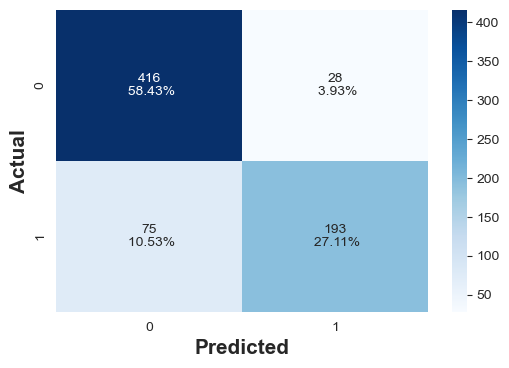

In [1173]:
confusion_matrix_statsmodels(rfm_tuned, X_train, y_train)

In [1174]:
# Evaluation on the test set

rfm_tuned_perf_test = model_performance_classification_statsmodels(rfm_tuned, X_test, y_test)
rfm_tuned_perf_test

,accuracy,precision,recall,f1
0,0.815642,0.80597,0.72973,0.765957


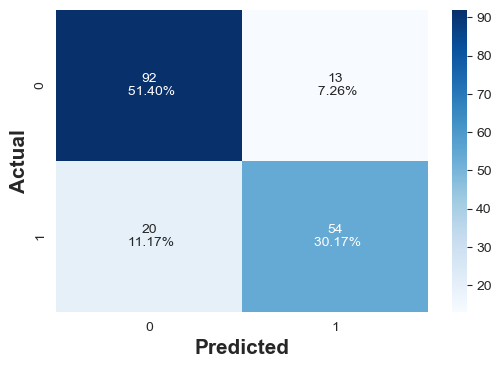

In [1175]:
confusion_matrix_statsmodels(rfm_tuned, X_test, y_test)

The overfitting is improved.

#### Feature Importance

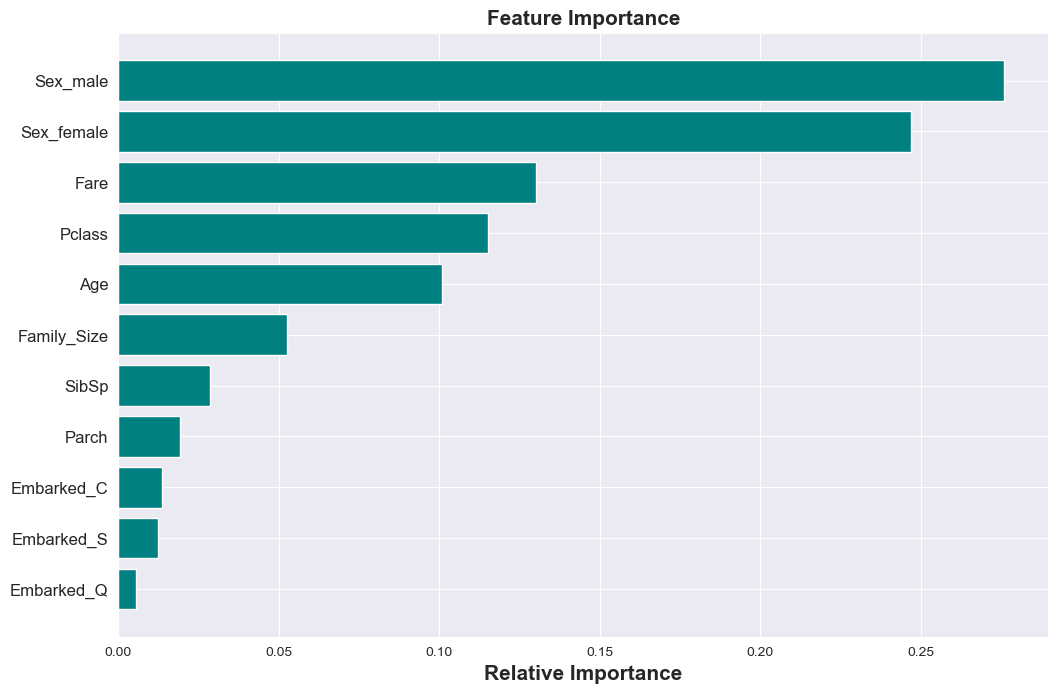

In [1184]:
# importance of features in the tree
feature_name = list(X_train.columns)
importance = rfm_tuned.feature_importances_

indices = np.argsort(importance)

plt.figure(figsize=(12, 8), dpi=100)

# plot the feature importance
plt.barh(range(len(indices)), importance[indices], color='teal', align='center')

plt.title('Feature Importance', fontsize=15, weight='bold')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices], fontsize=12)
plt.xlabel('Relative Importance', fontsize=15, weight='bold')
plt.show()

In [1185]:
# Drop the features with low importance, Embarked, Parch, SibSp

X_train_rfm_selected = X_train.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)
X_test_rfm_selected = X_test.drop(['Embarked_C', 'Embarked_Q', 'Embarked_S'], axis=1)

X_train_rfm_selected = X_train_rfm_selected.drop(['Parch', 'SibSp'], axis=1)
X_test_rfm_selected = X_test_rfm_selected.drop(['Parch', 'SibSp'], axis=1)

X_train_rfm_selected

,Pclass,Age,Fare,Family_Size,Sex_female,Sex_male
331,1,45.500000,28.5000,1,0,1
733,2,23.000000,13.0000,1,0,1
382,3,32.000000,7.9250,1,0,1
704,3,26.000000,7.8542,2,0,1
813,3,6.000000,31.2750,7,1,0
...,...,...,...,...,...,...
106,3,21.000000,7.6500,1,1,0
270,1,46.220599,31.0000,1,0,1
860,3,41.000000,14.1083,3,0,1
435,1,14.000000,120.0000,4,1,0


In [1186]:
# build the model

rfm_tuned_imp_selected = RandomForestClassifier(
    n_estimators=rfm_tuned.n_estimators,
    max_depth=rfm_tuned.max_depth,
    min_samples_split=rfm_tuned.min_samples_split,
    min_samples_leaf=rfm_tuned.min_samples_leaf,
    max_features=rfm_tuned.max_features,
    random_state=42
)

rfm_tuned_imp_selected.fit(X_train_rfm_selected, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=6, n_estimators=400,
                       random_state=42)

In [1187]:
# Evaluation on the train set

rfm_tuned_imp_selected_perf_train = model_performance_classification_statsmodels(
    rfm_tuned_imp_selected,
    X_train_rfm_selected,
    y_train
)

rfm_tuned_imp_selected_perf_train

,accuracy,precision,recall,f1
0,0.856742,0.880734,0.716418,0.790123


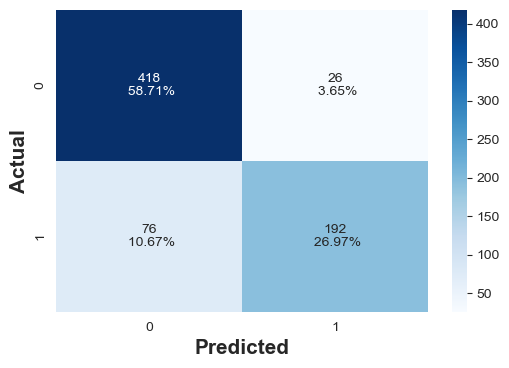

In [1188]:
confusion_matrix_statsmodels(rfm_tuned_imp_selected, X_train_rfm_selected, y_train)

In [1189]:
# Evaluation on the test set

rfm_tuned_imp_selected_perf_test = model_performance_classification_statsmodels(
    rfm_tuned_imp_selected,
    X_test_rfm_selected,
    y_test
)

rfm_tuned_imp_selected_perf_test

,accuracy,precision,recall,f1
0,0.821229,0.828125,0.716216,0.768116


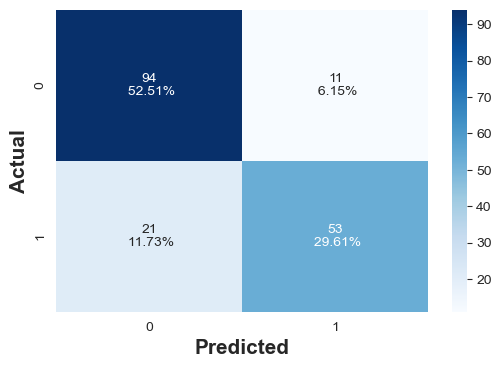

In [1190]:
confusion_matrix_statsmodels(rfm_tuned_imp_selected, X_test_rfm_selected, y_test)

In [1192]:
# Summary of the model performance in the Random Forest

rfm_models_train_comp_df = pd.concat(
    [
        rfm_default_perf_train,
        rfm_tuned_perf_train,
        rfm_tuned_imp_selected_perf_train
    ],
    axis=0
)

rfm_models_train_comp_df.index = [
    'Random Forest Default Train',
    'Random Forest Tuned Train',
    'Random Forest Tuned Selected Train'
]

rfm_models_train_comp_df.T

,Random Forest Default Train,Random Forest Tuned Train,Random Forest Tuned Selected Train
accuracy,0.980337,0.855337,0.856742
precision,0.988462,0.873303,0.880734
recall,0.958955,0.720149,0.716418
f1,0.973485,0.789366,0.790123


In [1193]:
rfm_models_test_comp_df = pd.concat(
    [
        rfm_default_perf_test,
        rfm_tuned_perf_test,
        rfm_tuned_imp_selected_perf_test
    ],
    axis=0
)

rfm_models_test_comp_df.index = [
    'Random Forest Default Test',
    'Random Forest Tuned Test',
    'Random Forest Tuned Selected Test'
]

rfm_models_test_comp_df.T

,Random Forest Default Test,Random Forest Tuned Test,Random Forest Tuned Selected Test
accuracy,0.832402,0.815642,0.821229
precision,0.797297,0.805970,0.828125
recall,0.797297,0.729730,0.716216
f1,0.797297,0.765957,0.768116


Selecting the most important features does not really improve the model performance.
But the hyperparameter tuning does improve the model performance.

We choose the Random Forest Tuned model as the final model in the Random Forest Model.

## Boosting

### XGBoost

In [1194]:
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(
    full_data_rfm_train.drop(['Survived'], axis=1),
    full_data_rfm_train['Survived'],
    test_size=0.2,
    random_state=42
)

print(X_train_xgb.shape, y_train_xgb.shape)
print(X_test_xgb.shape, y_test_xgb.shape)

(712, 11) (712,)
(179, 11) (179,)


In [1195]:
# build the model

from xgboost import XGBClassifier

xgb_default = XGBClassifier(random_state=42)

xgb_default.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [1196]:
# Evaluation on the train set

xgb_default_perf_train = model_performance_classification_statsmodels(xgb_default, X_train_xgb, y_train_xgb)

xgb_default_perf_train

,accuracy,precision,recall,f1
0,0.969101,0.980469,0.936567,0.958015


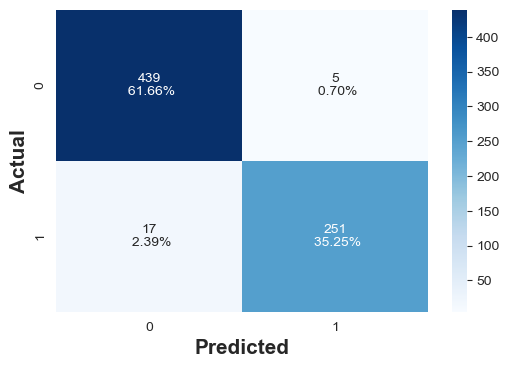

In [1197]:
confusion_matrix_statsmodels(xgb_default, X_train_xgb, y_train_xgb)

In [1198]:
# Evaluation on the test set

xgb_default_perf_test = model_performance_classification_statsmodels(xgb_default, X_test_xgb, y_test_xgb)

xgb_default_perf_test

,accuracy,precision,recall,f1
0,0.798883,0.74359,0.783784,0.763158


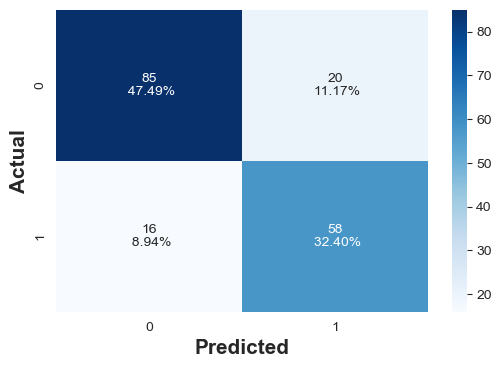

In [1199]:
confusion_matrix_statsmodels(xgb_default, X_test_xgb, y_test_xgb)

The XGB model is overfitting.
Let's do the hyperparameter tuning.

#### Hyperparameter Tuning

In [1200]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9, 11],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9]
}

scorer = metrics.make_scorer(metrics.f1_score)

xgb_gridCV = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring=scorer
)

xgb_gridCV.fit(X_train_xgb, y_train_xgb)

xgb_gridCV.best_params_

Fitting 5 folds for each of 3125 candidates, totalling 15625 fits


{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [1201]:
xgb_tuned = xgb_gridCV.best_estimator_

xgb_tuned.fit(X_train_xgb, y_train_xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [1202]:
# Evaluation on the train set

xgb_tuned_perf_train = model_performance_classification_statsmodels(xgb_tuned, X_train_xgb, y_train_xgb)

xgb_tuned_perf_train

,accuracy,precision,recall,f1
0,0.88764,0.923423,0.764925,0.836735


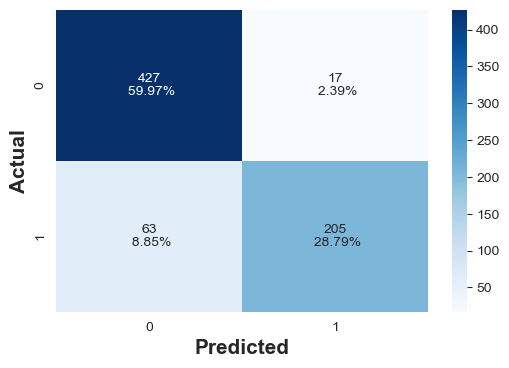

In [1203]:
confusion_matrix_statsmodels(xgb_tuned, X_train_xgb, y_train_xgb)

In [1204]:
# Evaluation on the test set

xgb_tuned_perf_test = model_performance_classification_statsmodels(xgb_tuned, X_test_xgb, y_test_xgb)

xgb_tuned_perf_test

,accuracy,precision,recall,f1
0,0.821229,0.818182,0.72973,0.771429


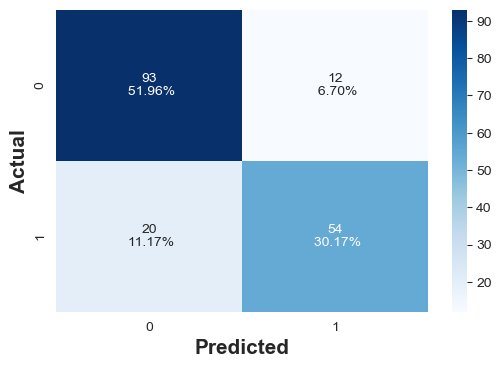

In [1205]:
confusion_matrix_statsmodels(xgb_tuned, X_test_xgb, y_test_xgb)

In [1206]:
# Summary of the model performance in the XGBoost

xgb_models_train_comp_df = pd.concat(
    [
        xgb_default_perf_train,
        xgb_tuned_perf_train
    ],
    axis=0
)

xgb_models_train_comp_df.index = [
    'XGBoost Default Train',
    'XGBoost Tuned Train'
]

xgb_models_train_comp_df.T

,XGBoost Default Train,XGBoost Tuned Train
accuracy,0.969101,0.887640
precision,0.980469,0.923423
recall,0.936567,0.764925
f1,0.958015,0.836735


### AdaBoost

In [1207]:
# build the model

from sklearn.ensemble import AdaBoostClassifier

ada_default = AdaBoostClassifier(random_state=42)

ada_default.fit(X_train_xgb, y_train_xgb)

AdaBoostClassifier(random_state=42)

In [1208]:
# Evaluation on the train set

ada_default_perf_train = model_performance_classification_statsmodels(ada_default, X_train_xgb, y_train_xgb)

ada_default_perf_train

,accuracy,precision,recall,f1
0,0.844101,0.823045,0.746269,0.782779


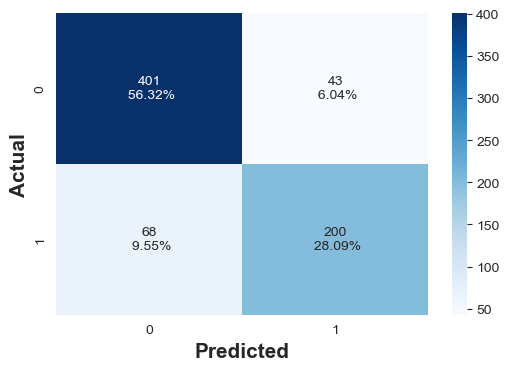

In [1209]:
confusion_matrix_statsmodels(ada_default, X_train_xgb, y_train_xgb)

In [1212]:
# Evaluation on the test set

ada_default_perf_test = model_performance_classification_statsmodels(ada_default, X_test_xgb, y_test_xgb)

ada_default_perf_test

,accuracy,precision,recall,f1
0,0.810056,0.777778,0.756757,0.767123


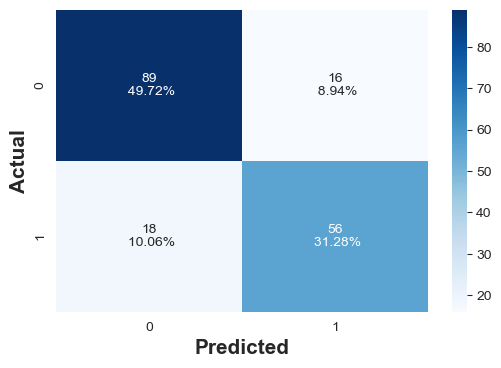

In [1213]:
confusion_matrix_statsmodels(ada_default, X_test_xgb, y_test_xgb)

The AdaBoost model is not overfitting.

In [1215]:
# hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

scorer = metrics.make_scorer(metrics.f1_score)

ada_gridCV = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring=scorer
)

ada_gridCV.fit(X_train_xgb, y_train_xgb)

ada_gridCV.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


{'learning_rate': 0.3, 'n_estimators': 200}

In [1216]:
# evaluation on the train set

ada_tuned = ada_gridCV.best_estimator_

ada_tuned.fit(X_train_xgb, y_train_xgb)

ada_tuned_perf_train = model_performance_classification_statsmodels(ada_tuned, X_train_xgb, y_train_xgb)

ada_tuned_perf_train

,accuracy,precision,recall,f1
0,0.830056,0.781609,0.761194,0.771267


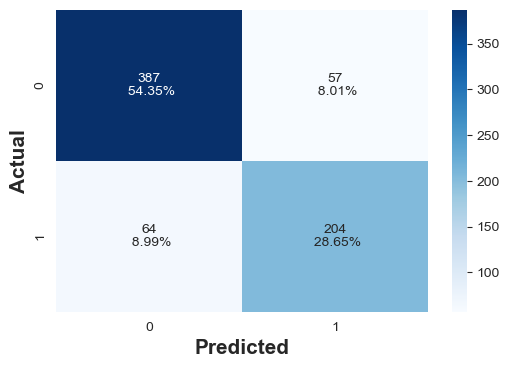

In [1217]:
confusion_matrix_statsmodels(ada_tuned, X_train_xgb, y_train_xgb)

In [1218]:
# evaluation on the test set

ada_tuned_perf_test = model_performance_classification_statsmodels(ada_tuned, X_test_xgb, y_test_xgb)

ada_tuned_perf_test

,accuracy,precision,recall,f1
0,0.804469,0.767123,0.756757,0.761905


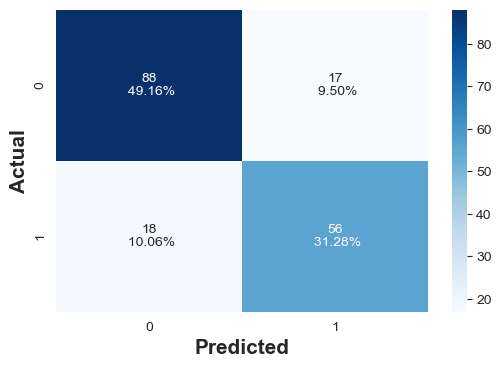

In [1219]:
confusion_matrix_statsmodels(ada_tuned, X_test_xgb, y_test_xgb)

### Gradient Boosting

In [1220]:
# build the model

from sklearn.ensemble import GradientBoostingClassifier

gbm_default = GradientBoostingClassifier(random_state=42)

gbm_default.fit(X_train_xgb, y_train_xgb)

GradientBoostingClassifier(random_state=42)

In [1222]:
# Evaluation on the train set

gbm_default_perf_train = model_performance_classification_statsmodels(gbm_default, X_train_xgb, y_train_xgb)

gbm_default_perf_train

,accuracy,precision,recall,f1
0,0.905899,0.950673,0.791045,0.863544


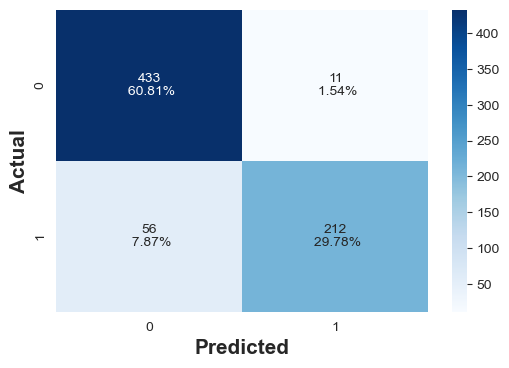

In [1223]:
confusion_matrix_statsmodels(gbm_default, X_train_xgb, y_train_xgb)

In [1224]:
# Evaluation on the test set

gbm_default_perf_test = model_performance_classification_statsmodels(gbm_default, X_test_xgb, y_test_xgb)

gbm_default_perf_test

,accuracy,precision,recall,f1
0,0.843575,0.859375,0.743243,0.797101


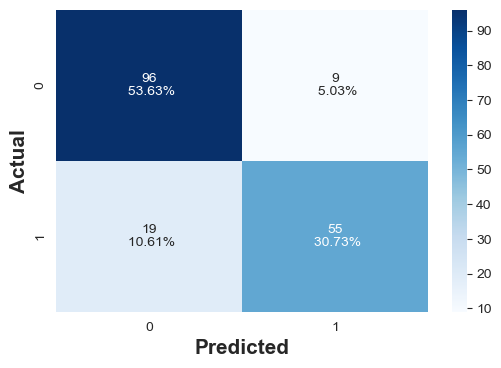

In [1225]:
confusion_matrix_statsmodels(gbm_default, X_test_xgb, y_test_xgb)

In [1226]:
# hyperparameter tuning

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 9, 11],
    'max_features': ['auto', 'sqrt', 'log2']
}

scorer = metrics.make_scorer(metrics.f1_score)

gbm_gridCV = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring=scorer
)

gbm_gridCV.fit(X_train_xgb, y_train_xgb)

gbm_gridCV.best_params_

Fitting 5 folds for each of 1875 candidates, totalling 9375 fits


/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3125 fits failed out of a total of 9375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1572 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/Lenovo/anaconda3/envs/conda/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params
 

{'learning_rate': 0.05,
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 100,
 'subsample': 0.9}

In [1227]:
gbm_tuned = gbm_gridCV.best_estimator_

gbm_tuned.fit(X_train_xgb, y_train_xgb)

GradientBoostingClassifier(learning_rate=0.05, max_features='sqrt',
                           random_state=42, subsample=0.9)

In [1228]:
# Evaluation on the train set

gbm_tuned_perf_train = model_performance_classification_statsmodels(gbm_tuned, X_train_xgb, y_train_xgb)

gbm_tuned_perf_train

,accuracy,precision,recall,f1
0,0.859551,0.875,0.731343,0.796748


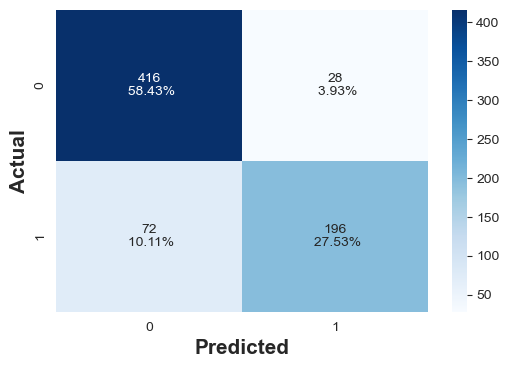

In [1229]:
confusion_matrix_statsmodels(gbm_tuned, X_train_xgb, y_train_xgb)

In [1230]:
# Evaluation on the test set

gbm_tuned_perf_test = model_performance_classification_statsmodels(gbm_tuned, X_test_xgb, y_test_xgb)

gbm_tuned_perf_test

,accuracy,precision,recall,f1
0,0.815642,0.80597,0.72973,0.765957


## Stacking Model

In [1231]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rfm', rfm_tuned),
    ('xgb', xgb_tuned),
    ('ada', ada_tuned),
    ('gbm', gbm_tuned)
]

stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42)
)

stacking_model.fit(X_train_xgb, y_train_xgb)

StackingClassifier(estimators=[('rfm',
                                RandomForestClassifier(max_depth=5,
                                                       min_samples_split=6,
                                                       n_estimators=400,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.8,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gam...
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=42, ...)),
                               ('ada',
                                AdaBoostClassifier(learning_rate=0.3,
                                                   n_estimators=200,
                                                   random_state=42)),
                               ('gbm',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_features='sqrt',
                                                           random_state=42,
                                                           subsample=0.9))],
                   final_estimator=LogisticRegression(random_state=42))

In [1232]:
# Evaluation on the train set

stacking_model_perf_train = model_performance_classification_statsmodels(stacking_model, X_train_xgb, y_train_xgb)

stacking_model_perf_train

,accuracy,precision,recall,f1
0,0.873596,0.908257,0.738806,0.814815


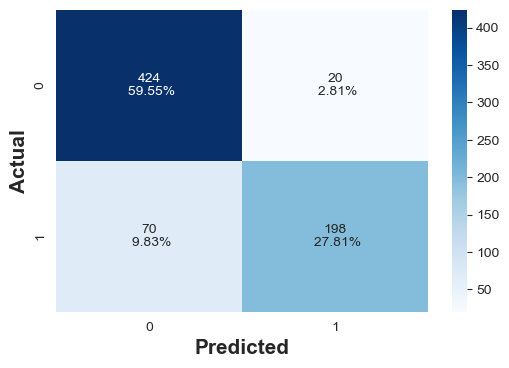

In [1233]:
confusion_matrix_statsmodels(stacking_model, X_train_xgb, y_train_xgb)

In [1235]:
# Evaluation on the test set

stacking_model_perf_test = model_performance_classification_statsmodels(stacking_model, X_test_xgb, y_test_xgb)

stacking_model_perf_test

,accuracy,precision,recall,f1
0,0.821229,0.828125,0.716216,0.768116


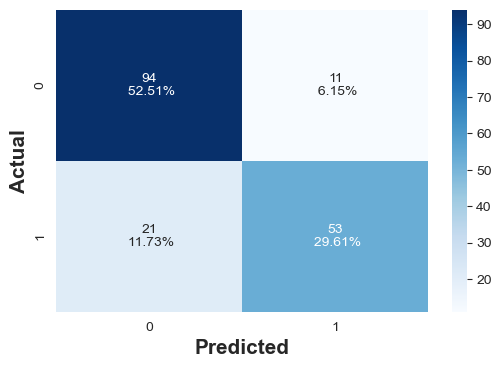

In [1236]:
confusion_matrix_statsmodels(stacking_model, X_test_xgb, y_test_xgb)

### Model Performance Summary

In [1241]:
rfm_models_train_comp_df

,accuracy,precision,recall,f1
Random Forest Default Train,0.980337,0.988462,0.958955,0.973485
Random Forest Tuned Train,0.855337,0.873303,0.720149,0.789366
Random Forest Tuned Selected Train,0.856742,0.880734,0.716418,0.790123


In [1245]:
xgb_tuned_perf_train

,accuracy,precision,recall,f1
0,0.88764,0.923423,0.764925,0.836735


In [1246]:
ada_tuned_perf_train

,accuracy,precision,recall,f1
0,0.830056,0.781609,0.761194,0.771267


In [1247]:
gbm_tuned_perf_train

,accuracy,precision,recall,f1
0,0.859551,0.875,0.731343,0.796748


In [1248]:
stacking_model_perf_train

,accuracy,precision,recall,f1
0,0.873596,0.908257,0.738806,0.814815


In [1253]:
# summary of the model performance on the train set

models_train_comp_df = pd.concat(
    [
        rfm_models_train_comp_df,
        xgb_default_perf_train,
        xgb_tuned_perf_train,
        ada_default_perf_train,
        ada_tuned_perf_train,
        gbm_default_perf_train,
        gbm_tuned_perf_train,
        stacking_model_perf_train
    ],
    axis=0
)

models_train_comp_df.index = [
    'Random Forest Default Train',
    'Random Forest Tuned Train',
    'Random Forest Tuned Selected Train',
    'XGBoost Default Train',
    'XGBoost Tuned Train',
    'AdaBoost Default Train',
    'AdaBoost Tuned Train',
    'Gradient Boosting Default Train',
    'Gradient Boosting Tuned Train',
    'Stacking Model Train'
]


In [1254]:
models_train_comp_df.T

,Random Forest Default Train,Random Forest Tuned Train,Random Forest Tuned Selected Train,XGBoost Default Train,XGBoost Tuned Train,AdaBoost Default Train,AdaBoost Tuned Train,Gradient Boosting Default Train,Gradient Boosting Tuned Train,Stacking Model Train
accuracy,0.980337,0.855337,0.856742,0.969101,0.887640,0.844101,0.830056,0.905899,0.859551,0.873596
precision,0.988462,0.873303,0.880734,0.980469,0.923423,0.823045,0.781609,0.950673,0.875000,0.908257
recall,0.958955,0.720149,0.716418,0.936567,0.764925,0.746269,0.761194,0.791045,0.731343,0.738806
f1,0.973485,0.789366,0.790123,0.958015,0.836735,0.782779,0.771267,0.863544,0.796748,0.814815


In [1255]:
# summary of the model performance on the test set

models_test_comp_df = pd.concat(
    [
        rfm_models_test_comp_df,
        xgb_default_perf_test,
        xgb_tuned_perf_test,
        ada_default_perf_test,
        ada_tuned_perf_test,
        gbm_default_perf_test,
        gbm_tuned_perf_test,
        stacking_model_perf_test
    ],
    axis=0
)

models_test_comp_df.index = [
    'Random Forest Default Test',
    'Random Forest Tuned Test',
    'Random Forest Tuned Selected Test',
    'XGBoost Default Test',
    'XGBoost Tuned Test',
    'AdaBoost Default Test',
    'AdaBoost Tuned Test',
    'Gradient Boosting Default Test',
    'Gradient Boosting Tuned Test',
    'Stacking Model Test'
]

In [1256]:
models_test_comp_df.T

,Random Forest Default Test,Random Forest Tuned Test,Random Forest Tuned Selected Test,XGBoost Default Test,XGBoost Tuned Test,AdaBoost Default Test,AdaBoost Tuned Test,Gradient Boosting Default Test,Gradient Boosting Tuned Test,Stacking Model Test
accuracy,0.832402,0.815642,0.821229,0.798883,0.821229,0.810056,0.804469,0.843575,0.815642,0.821229
precision,0.797297,0.805970,0.828125,0.743590,0.818182,0.777778,0.767123,0.859375,0.805970,0.828125
recall,0.797297,0.729730,0.716216,0.783784,0.729730,0.756757,0.756757,0.743243,0.729730,0.716216
f1,0.797297,0.765957,0.768116,0.763158,0.771429,0.767123,0.761905,0.797101,0.765957,0.768116


We could find that the Gradient Boosting Tuned model has the best performance on the test set.
Let's use the Gradient Boosting Tuned model as the final model.

In [1257]:
final_model = gbm_tuned

final_model.fit(X_train_xgb, y_train_xgb)

final_model_perf_train = model_performance_classification_statsmodels(final_model, X_train_xgb, y_train_xgb)

final_model_perf_train

,accuracy,precision,recall,f1
0,0.859551,0.875,0.731343,0.796748


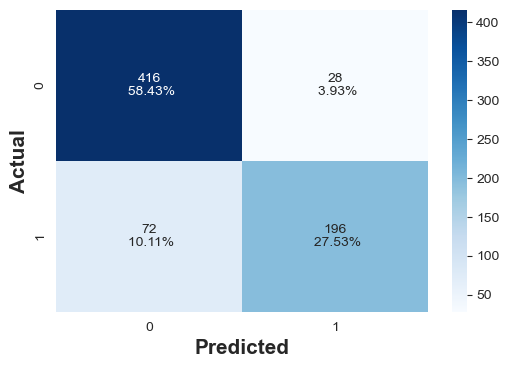

In [1258]:
confusion_matrix_statsmodels(final_model, X_train_xgb, y_train_xgb)

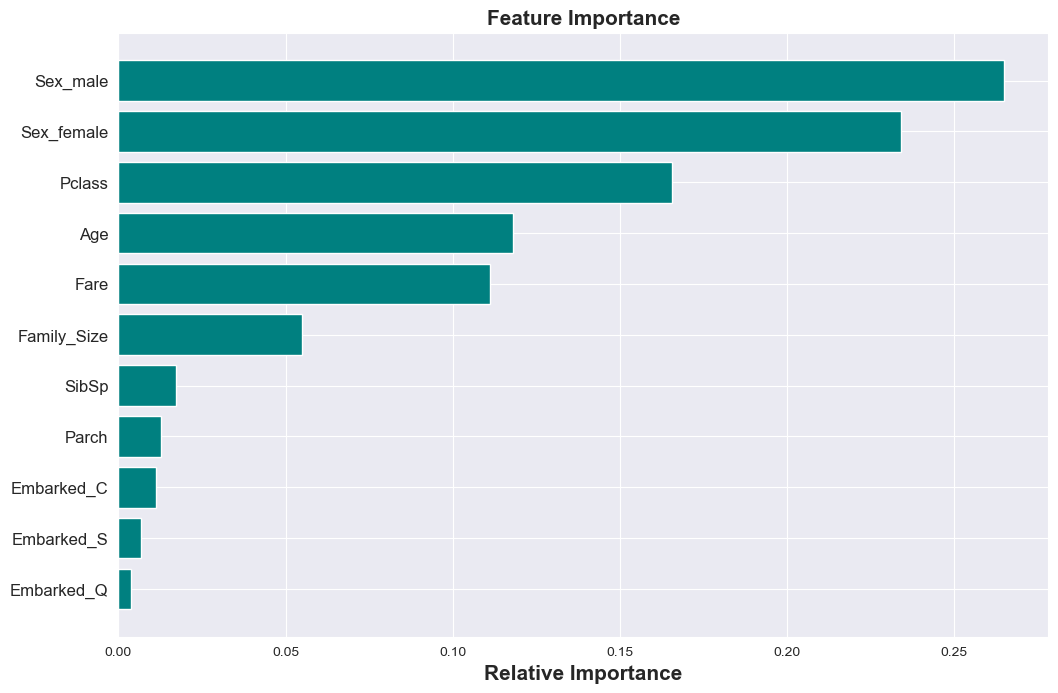

In [1259]:
# plot the importance of features

feature_name = list(X_train_xgb.columns)
importance = final_model.feature_importances_

indices = np.argsort(importance)

plt.figure(figsize=(12, 8), dpi=100)

# plot the feature importance

plt.barh(range(len(indices)), importance[indices], color='teal', align='center')

plt.title('Feature Importance', fontsize=15, weight='bold')

plt.yticks(range(len(indices)), [feature_name[i] for i in indices], fontsize=12)

plt.xlabel('Relative Importance', fontsize=15, weight='bold')

plt.show()


## Model Deployment on the Test Set

In [1277]:
full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Adult,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Adult,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adult,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.745022,0,0,A.5. 3236,8.0500,S,Adult,1
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C,Adult,1
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S,Adult,1
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.745022,0,0,359309,8.0500,S,Adult,1


In [1278]:
full_data_final_test = full.loc[full.Survived.isnull(), :].drop(['PassengerId', 'Name', 'Ticket', 'Age_Group'], axis=1)

In [1279]:
full_data_final_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size
891,NaN,3,male,34.500000,0,0,7.8292,Q,1
892,NaN,3,female,47.000000,1,0,7.0000,S,2
893,NaN,2,male,62.000000,0,0,9.6875,Q,1
894,NaN,3,male,27.000000,0,0,8.6625,S,1
895,NaN,3,female,22.000000,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
1304,NaN,3,male,29.745022,0,0,8.0500,S,1
1305,NaN,1,female,39.000000,0,0,108.9000,C,1
1306,NaN,3,male,38.500000,0,0,7.2500,S,1
1307,NaN,3,male,29.745022,0,0,8.0500,S,1


In [1280]:
final_set = pd.get_dummies(full_data_final_test)
final_set

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,NaN,3,34.500000,0,0,7.8292,1,0,1,0,1,0
892,NaN,3,47.000000,1,0,7.0000,2,1,0,0,0,1
893,NaN,2,62.000000,0,0,9.6875,1,0,1,0,1,0
894,NaN,3,27.000000,0,0,8.6625,1,0,1,0,0,1
895,NaN,3,22.000000,1,1,12.2875,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,29.745022,0,0,8.0500,1,0,1,0,0,1
1305,NaN,1,39.000000,0,0,108.9000,1,1,0,1,0,0
1306,NaN,3,38.500000,0,0,7.2500,1,0,1,0,0,1
1307,NaN,3,29.745022,0,0,8.0500,1,0,1,0,0,1


In [1281]:
final_set.drop(['Survived'], axis=1, inplace=True)

final_set

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
891,3,34.500000,0,0,7.8292,1,0,1,0,1,0
892,3,47.000000,1,0,7.0000,2,1,0,0,0,1
893,2,62.000000,0,0,9.6875,1,0,1,0,1,0
894,3,27.000000,0,0,8.6625,1,0,1,0,0,1
895,3,22.000000,1,1,12.2875,3,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,29.745022,0,0,8.0500,1,0,1,0,0,1
1305,1,39.000000,0,0,108.9000,1,1,0,1,0,0
1306,3,38.500000,0,0,7.2500,1,0,1,0,0,1
1307,3,29.745022,0,0,8.0500,1,0,1,0,0,1


In [1282]:
final_set_pred = final_model.predict(final_set)
final_set_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [1283]:
# combine the PassengerId and the prediction

final_set_pred_df = pd.DataFrame(
    {'PassengerId': full.loc[full.Survived.isnull(), 'PassengerId'], 'Survived': final_set_pred})

final_set_pred_df

,PassengerId,Survived
891,892,0.0
892,893,1.0
893,894,0.0
894,895,0.0
895,896,1.0
...,...,...
1304,1305,0.0
1305,1306,1.0
1306,1307,0.0
1307,1308,0.0


In [1285]:
# write into the csv file

final_set_pred_df.to_csv('final_set_pred_df.csv', index=False)